# Telecom Churn
## Task:
## 1. predict which customers are at high risk of churn.
## 2. identify the main indicators of churn.

Importing all necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
%matplotlib inline
%config IPCompleter.greedy=True
from sklearn.decomposition import IncrementalPCA
from sklearn.decomposition import PCA

Code to filter unnecessary warnings

In [2]:
#to Suppress unnecessary warnings
warnings.filterwarnings("ignore")

Defining the path to the Dataset

In [3]:
teleDataFile=r'telecom_churn_data.csv'

Reading the Dataset

In [4]:
teleData= pd.read_csv(teleDataFile)

Finding out the number of non-null values in the dataset

In [5]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(teleData.info(verbose=True,null_counts =True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
mobile_number               99999 non-null int64
circle_id                   99999 non-null int64
loc_og_t2o_mou              98981 non-null float64
std_og_t2o_mou              98981 non-null float64
loc_ic_t2o_mou              98981 non-null float64
last_date_of_month_6        99999 non-null object
last_date_of_month_7        99398 non-null object
last_date_of_month_8        98899 non-null object
last_date_of_month_9        98340 non-null object
arpu_6                      99999 non-null float64
arpu_7                      99999 non-null float64
arpu_8                      99999 non-null float64
arpu_9                      99999 non-null float64
onnet_mou_6                 96062 non-null float64
onnet_mou_7                 96140 non-null float64
onnet_mou_8                 94621 non-null float64
onnet_mou_9                 92254 non-null float64
offnet_mou_6                960

looking into the stats of all the columns of the dataset 

In [6]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(teleData.describe())

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   9.999900e+04    99999.0         98981.0         98981.0   
mean    7.001207e+09      109.0             0.0             0.0   
std     6.956694e+05        0.0             0.0             0.0   
min     7.000000e+09      109.0             0.0             0.0   
25%     7.000606e+09      109.0             0.0             0.0   
50%     7.001205e+09      109.0             0.0             0.0   
75%     7.001812e+09      109.0             0.0             0.0   
max     7.002411e+09      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9  \
count         98981.0  99999.000000  99999.000000  99999.000000  99999.000000   
mean              0.0    282.987358    278.536648    279.154731    261.645069   
std               0.0    328.439770    338.156291    344.474791    341.998630   
min               0.0  -2258.709000  -2014.045000   -945.808000  -1899.505000   
25%               0.0     93.411500     86.980500     84.126000     62.685000   
50%               0.0    197.704000    191.640000    192.080000    176.849000   
75%               0.0    371.060000    365.344500    369.370500    353.466500   
max               0.0  27731.088000  35145.834000  33543.624000  38805.617000   

        onnet_mou_6   onnet_mou_7   onnet_mou_8   onnet_mou_9  offnet_mou_6  \
count  96062.000000  96140.000000  94621.000000  92254.000000  96062.000000   
mean     132.395875    133.670805    133.018098    130.302327    197.935577   
std      297.207406    308.794148    308.951589    308.477668    316.851613   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        7.380000      6.660000      6.460000      5.330000     34.730000   
50%       34.310000     32.330000     32.360000     29.840000     96.310000   
75%      118.740000    115.595000    115.860000    112.130000    231.860000   
max     7376.710000   8157.780000  10752.560000  10427.460000   8362.360000   

       offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
count  96140.000000  94621.000000  92254.000000   96062.000000   96140.000000   
mean     197.045133    196.574803    190.337222       9.950013       7.149898   
std      325.862803    327.170662    319.396092      72.825411      73.447948   
min        0.000000      0.000000      0.000000       0.000000       0.000000   
25%       32.190000     31.630000     27.130000       0.000000       0.000000   
50%       91.735000     92.140000     87.290000       0.000000       0.000000   
75%      226.815000    228.260000    220.505000       0.000000       0.000000   
max     9667.130000  14007.340000  10310.760000   13724.380000   15371.040000   

       roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
count   94621.000000   92254.000000   96062.000000   96140.000000   
mean        7.292981       6.343841      13.911337       9.818732   
std        68.402466      57.137537      71.443196      58.455762   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max     13095.360000    8464.030000    3775.110000    2812.040000   

       roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   94621.000000   92254.000000      96062.000000      96140.000000   
mean        9.971890       8.555519         47.100763         46.473010   
std        64.713221      58.438186        150.856393        155.318705   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          1.660000          1.630000   
50%         0.000000       0.000000         11.910000         11.610000   
75%         0.000000       0.000000         40.960000         39.910000   
max      

Taking a peek into the dataset

In [7]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(teleData.head(5))

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

Finding the number of unique values in each column of the dataset

In [8]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
        display(teleData.nunique(axis=0,dropna=False))

mobile_number               99999
circle_id                       1
loc_og_t2o_mou                  2
std_og_t2o_mou                  2
loc_ic_t2o_mou                  2
last_date_of_month_6            1
last_date_of_month_7            2
last_date_of_month_8            2
last_date_of_month_9            2
arpu_6                      85681
arpu_7                      85308
arpu_8                      83615
arpu_9                      79937
onnet_mou_6                 24314
onnet_mou_7                 24337
onnet_mou_8                 24090
onnet_mou_9                 23566
offnet_mou_6                31141
offnet_mou_7                31024
offnet_mou_8                30909
offnet_mou_9                30078
roam_ic_mou_6                6513
roam_ic_mou_7                5231
roam_ic_mou_8                5316
roam_ic_mou_9                4828
roam_og_mou_6                8039
roam_og_mou_7                6640
roam_og_mou_8                6505
roam_og_mou_9                5883
loc_og_t2t_mou

we can see that there are columns with 1 or 2 unique values to as high as 82k unique values(not taking into account the mobile_number which ofcourse will have unique values) 

Printing all the unique values for columns with less then 100 unique values including null/nan:

In [25]:
for col in list(teleData.columns):
    if(teleData[col].nunique()>500 ): continue
    else:
        print(col+":"+str(teleData[col].unique().tolist()))
        print("----------------------------------------------------------------------------------")

circle_id:[109]
----------------------------------------------------------------------------------
loc_og_t2o_mou:[0.0, nan]
----------------------------------------------------------------------------------
std_og_t2o_mou:[0.0, nan]
----------------------------------------------------------------------------------
loc_ic_t2o_mou:[0.0, nan]
----------------------------------------------------------------------------------
last_date_of_month_6:['6/30/2014']
----------------------------------------------------------------------------------
last_date_of_month_7:['7/31/2014', nan]
----------------------------------------------------------------------------------
last_date_of_month_8:['8/31/2014', nan]
----------------------------------------------------------------------------------
last_date_of_month_9:['9/30/2014', nan]
----------------------------------------------------------------------------------
std_og_t2c_mou_6:[nan, 0.0]
-----------------------------------------------------------

date_of_last_rech_6:['6/21/2014', '6/29/2014', '6/17/2014', '6/28/2014', '6/26/2014', '6/19/2014', '6/27/2014', '6/25/2014', '6/14/2014', '6/18/2014', '6/20/2014', '6/30/2014', '6/23/2014', nan, '6/22/2014', '6/24/2014', '6/12/2014', '6/3/2014', '6/11/2014', '6/16/2014', '6/10/2014', '6/15/2014', '6/13/2014', '6/7/2014', '6/8/2014', '6/6/2014', '6/2/2014', '6/4/2014', '6/5/2014', '6/1/2014', '6/9/2014']
----------------------------------------------------------------------------------
date_of_last_rech_7:['7/16/2014', '7/31/2014', '7/24/2014', '7/28/2014', '7/17/2014', '7/25/2014', '7/23/2014', '7/5/2014', '7/10/2014', '7/22/2014', '7/30/2014', '7/3/2014', '7/7/2014', '7/29/2014', '7/27/2014', '7/19/2014', '7/14/2014', '7/20/2014', '7/4/2014', '7/12/2014', nan, '7/26/2014', '7/11/2014', '7/6/2014', '7/21/2014', '7/13/2014', '7/15/2014', '7/18/2014', '7/9/2014', '7/2/2014', '7/8/2014', '7/1/2014']
----------------------------------------------------------------------------------
date_of

count_rech_2g_7:[0.0, 1.0, nan, 2.0, 5.0, 12.0, 7.0, 3.0, 6.0, 10.0, 8.0, 4.0, 16.0, 11.0, 9.0, 13.0, 15.0, 29.0, 22.0, 14.0, 23.0, 17.0, 21.0, 19.0, 20.0, 18.0, 26.0, 27.0, 30.0, 25.0, 28.0, 31.0, 32.0, 48.0, 43.0, 35.0, 24.0]
----------------------------------------------------------------------------------
count_rech_2g_8:[0.0, 2.0, nan, 3.0, 1.0, 16.0, 7.0, 4.0, 5.0, 13.0, 15.0, 24.0, 6.0, 12.0, 9.0, 10.0, 14.0, 8.0, 27.0, 11.0, 18.0, 29.0, 22.0, 17.0, 19.0, 26.0, 25.0, 21.0, 33.0, 34.0, 20.0, 44.0, 32.0, 31.0, 23.0]
----------------------------------------------------------------------------------
count_rech_2g_9:[nan, 1.0, 0.0, 2.0, 3.0, 5.0, 6.0, 8.0, 7.0, 11.0, 12.0, 4.0, 9.0, 10.0, 14.0, 33.0, 35.0, 13.0, 22.0, 15.0, 18.0, 24.0, 21.0, 16.0, 27.0, 40.0, 30.0, 25.0, 32.0, 20.0, 23.0, 17.0, 19.0]
----------------------------------------------------------------------------------
count_rech_3g_6:[1.0, nan, 0.0, 5.0, 3.0, 2.0, 8.0, 4.0, 6.0, 10.0, 22.0, 7.0, 13.0, 11.0, 29.0, 16.0, 

Finding the percentage of Null values in each column:

In [10]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print (teleData.isnull().mean())

mobile_number               0.000000
circle_id                   0.000000
loc_og_t2o_mou              0.010180
std_og_t2o_mou              0.010180
loc_ic_t2o_mou              0.010180
last_date_of_month_6        0.000000
last_date_of_month_7        0.006010
last_date_of_month_8        0.011000
last_date_of_month_9        0.016590
arpu_6                      0.000000
arpu_7                      0.000000
arpu_8                      0.000000
arpu_9                      0.000000
onnet_mou_6                 0.039370
onnet_mou_7                 0.038590
onnet_mou_8                 0.053781
onnet_mou_9                 0.077451
offnet_mou_6                0.039370
offnet_mou_7                0.038590
offnet_mou_8                0.053781
offnet_mou_9                0.077451
roam_ic_mou_6               0.039370
roam_ic_mou_7               0.038590
roam_ic_mou_8               0.053781
roam_ic_mou_9               0.077451
roam_og_mou_6               0.039370
roam_og_mou_7               0.038590
r

WE can see that the null values are occuring in pairs. for ex: 

og_others and ic_others
1. og_others_6    --             0.039370 => ic_others_6      --           0.039370
2. og_others_7    --             0.038590 => ic_others_7      --           0.038590
3. og_others_8    --             0.053781 => ic_others_8      --           0.053781
4. og_others_9    --             0.077451 => ic_others_9      --           0.077451

Same is the case for onnet_mou,offnet_mou,roam_ic_mou,roam_og_mou,loc_og_t2t_mou,loc_og_mou,std_og_t2t_mou,std_og_t2m_mou,std_og_t2f_mou,std_og_t2c_mou,std_og_mou,isd_og_mou,spl_og_mou,og_others,loc_ic_t2t_mou,loc_ic_t2m_mou,loc_ic_t2f_mou,loc_ic_mou,std_ic_t2t_mou etc.

Infact all these columns are propagating the null value for the same rows. So we can safely put 0 as the missing value for these rows. 

# Exploratory Data Analysis

## Trend and Outlier detection Univariate and Multivariate Analaysis

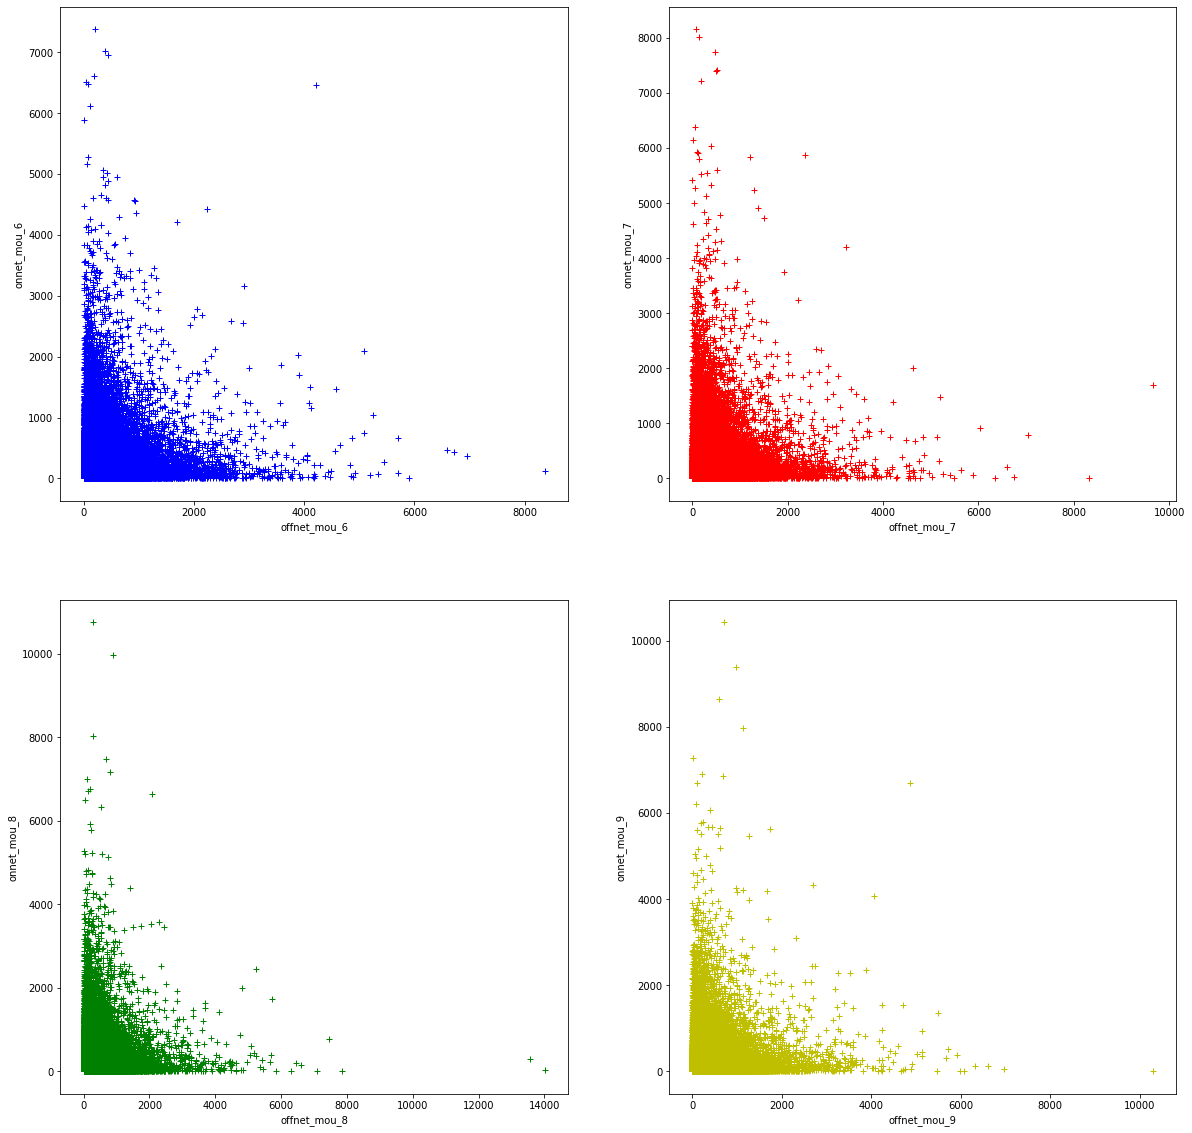

In [11]:
fig=plt.figure(figsize=(20,20))

((ax1, ax2), (ax3, ax4)) = fig.subplots(2, 2)

ax1.plot(teleData['offnet_mou_6'],teleData['onnet_mou_6'],"b+")
ax1.set_xlabel("offnet_mou_6")
ax1.set_ylabel("onnet_mou_6")

ax2.plot(teleData['offnet_mou_7'],teleData['onnet_mou_7'],"r+")
ax2.set_xlabel("offnet_mou_7")
ax2.set_ylabel("onnet_mou_7")

ax3.plot(teleData['offnet_mou_8'],teleData['onnet_mou_8'],"g+")
ax3.set_xlabel("offnet_mou_8")
ax3.set_ylabel("onnet_mou_8")

ax4.plot(teleData['offnet_mou_9'],teleData['onnet_mou_9'],"y+")
ax4.set_xlabel("offnet_mou_9")
ax4.set_ylabel("onnet_mou_9")
plt.show()

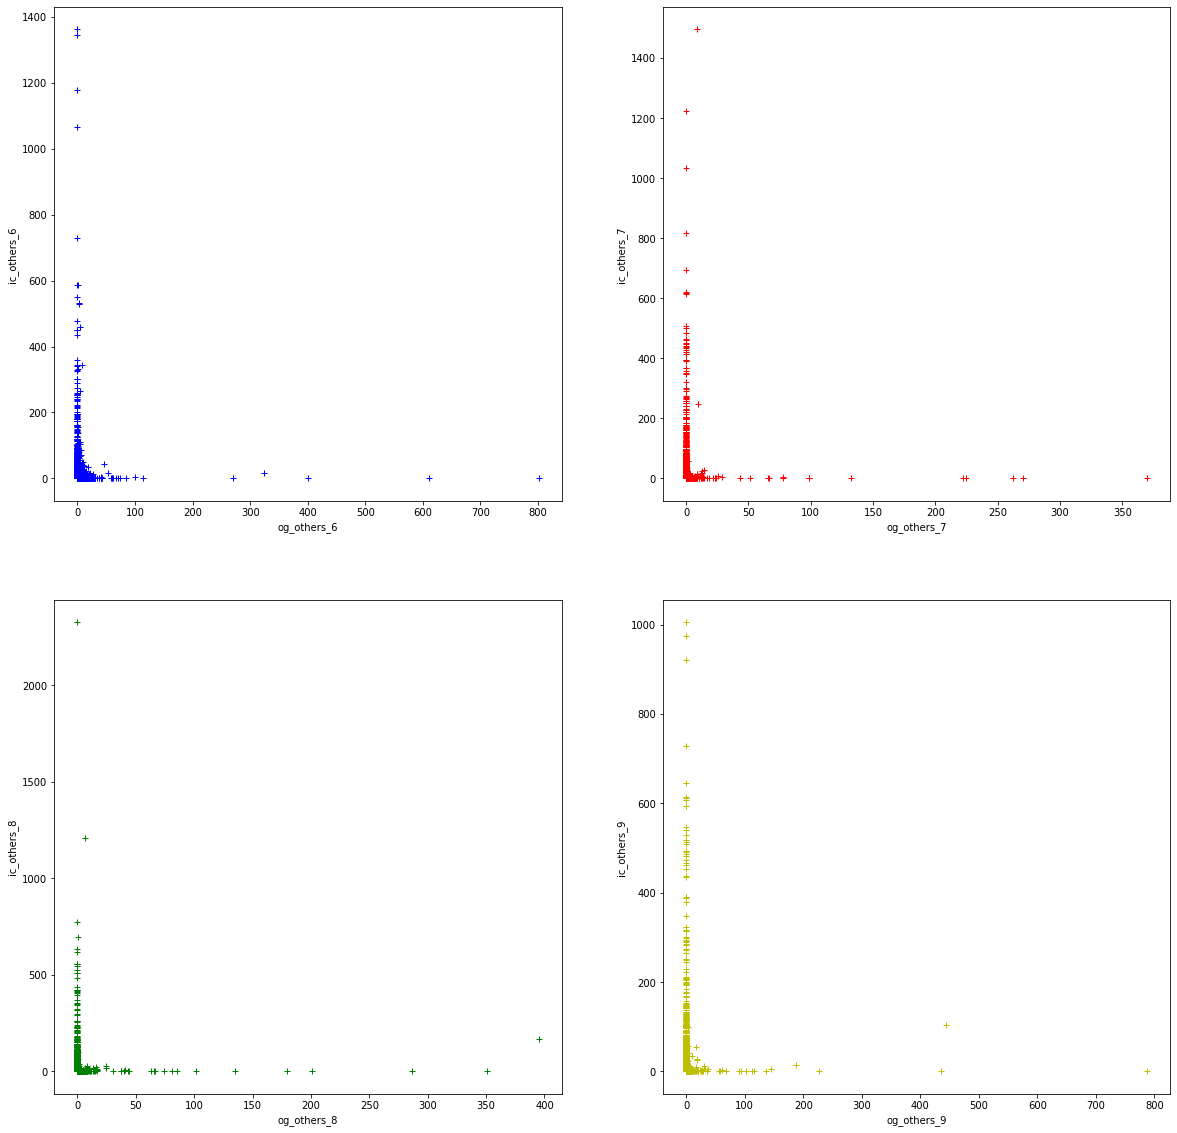

In [12]:
fig=plt.figure(figsize=(20,20))

((ax1, ax2), (ax3, ax4)) = fig.subplots(2, 2)

ax1.plot(teleData['og_others_6'],teleData['ic_others_6'],"b+")
ax1.set_xlabel("og_others_6")
ax1.set_ylabel("ic_others_6")

ax2.plot(teleData['og_others_7'],teleData['ic_others_7'],"r+")
ax2.set_xlabel("og_others_7")
ax2.set_ylabel("ic_others_7")

ax3.plot(teleData['og_others_8'],teleData['ic_others_8'],"g+")
ax3.set_xlabel("og_others_8")
ax3.set_ylabel("ic_others_8")

ax4.plot(teleData['og_others_9'],teleData['ic_others_9'],"y+")
ax4.set_xlabel("og_others_9")
ax4.set_ylabel("ic_others_9")
plt.show()

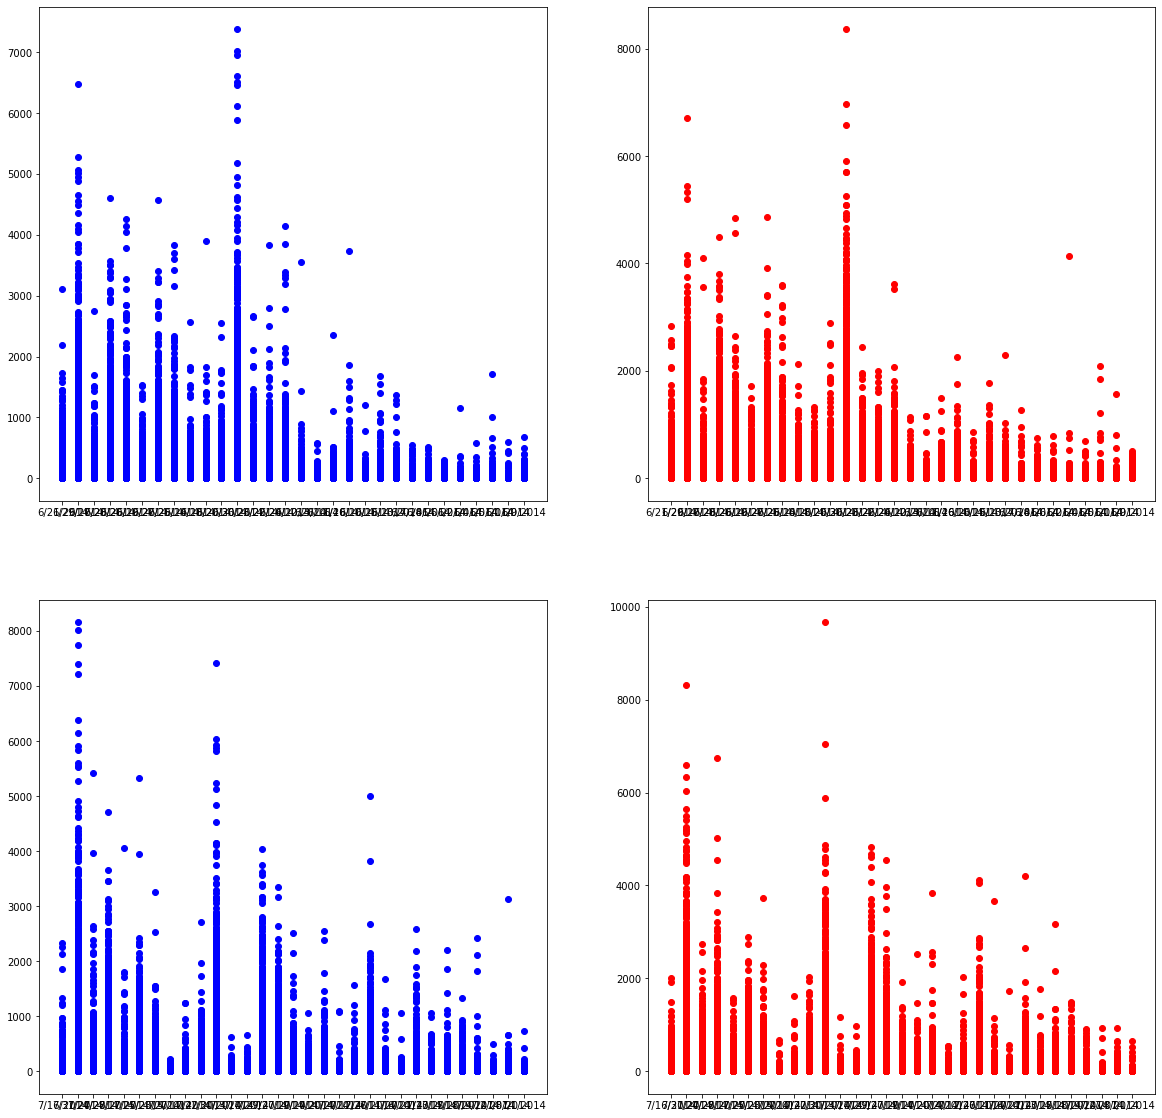

In [13]:
fig=plt.figure(figsize=(20,20))
((ax1, ax2), (ax3, ax4)) = fig.subplots(2, 2)

ax1.plot(teleData['date_of_last_rech_6'].fillna('6/30/2014'),teleData['onnet_mou_6'],"bo")
ax2.plot(teleData['date_of_last_rech_6'].fillna('6/30/2014'),teleData['offnet_mou_6'],"ro")


ax3.plot(teleData['date_of_last_rech_7'].fillna('7/30/2014'),teleData['onnet_mou_7'],"bo")
ax4.plot(teleData['date_of_last_rech_7'].fillna('7/30/2014'),teleData['offnet_mou_7'],"ro")

plt.show()

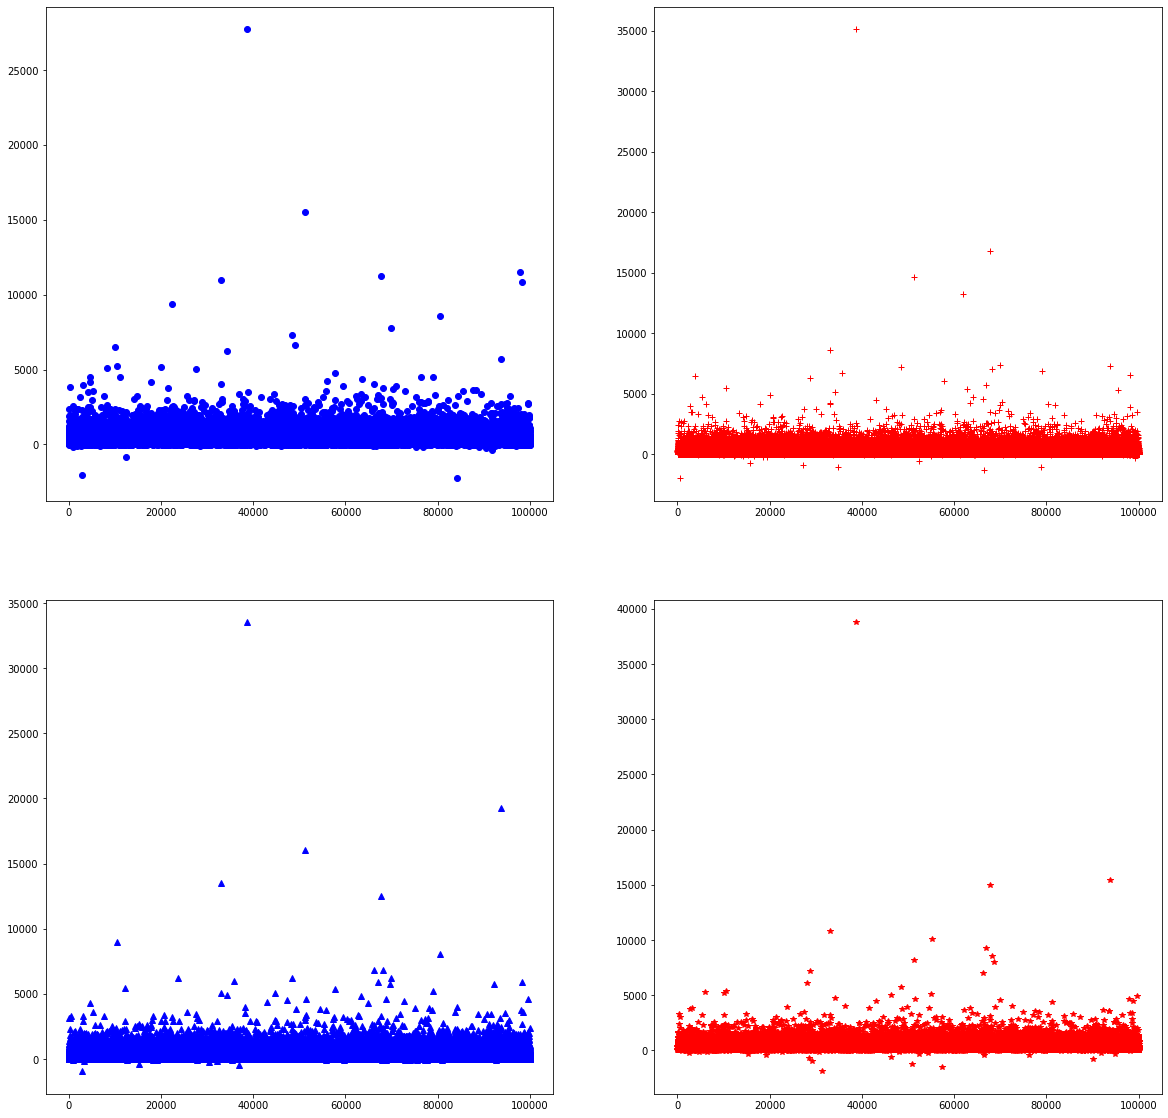

In [14]:
fig=plt.figure(figsize=(20,20))
((ax1, ax2), (ax3, ax4)) = fig.subplots(2, 2)

ax1.plot(teleData['arpu_6'],"bo")
ax2.plot(teleData['arpu_7'],"r+")
ax3.plot(teleData['arpu_8'],"b^")
ax4.plot(teleData['arpu_9'],"r*")

plt.show()

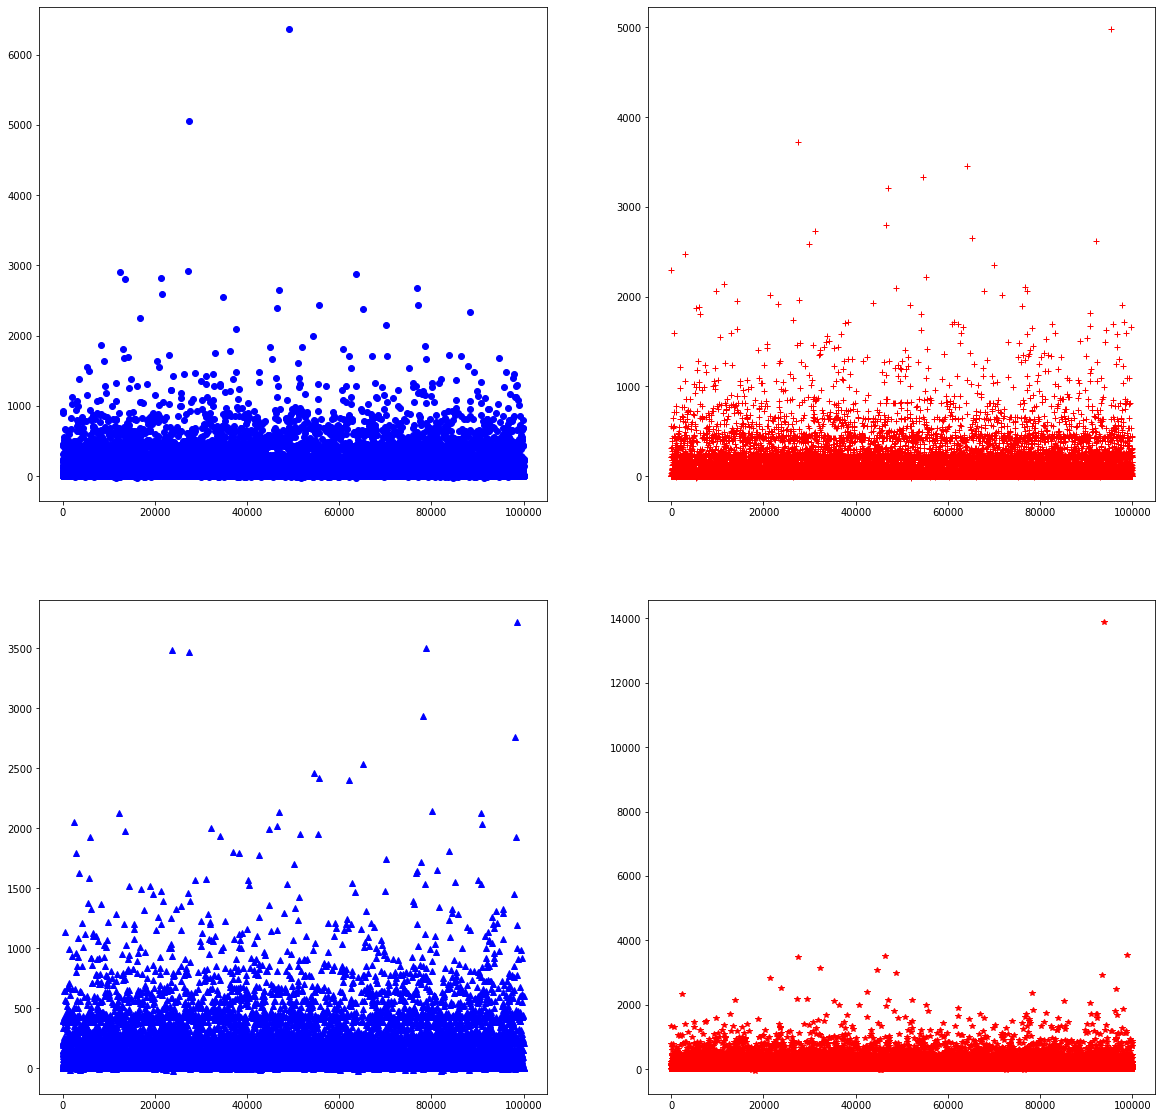

In [15]:
fig=plt.figure(figsize=(20,20))
((ax1, ax2), (ax3, ax4)) = fig.subplots(2, 2)

ax1.plot(teleData['arpu_3g_6'],"bo")
ax2.plot(teleData['arpu_3g_7'],"r+")
ax3.plot(teleData['arpu_3g_8'],"b^")
ax4.plot(teleData['arpu_3g_9'],"r*")

plt.show()

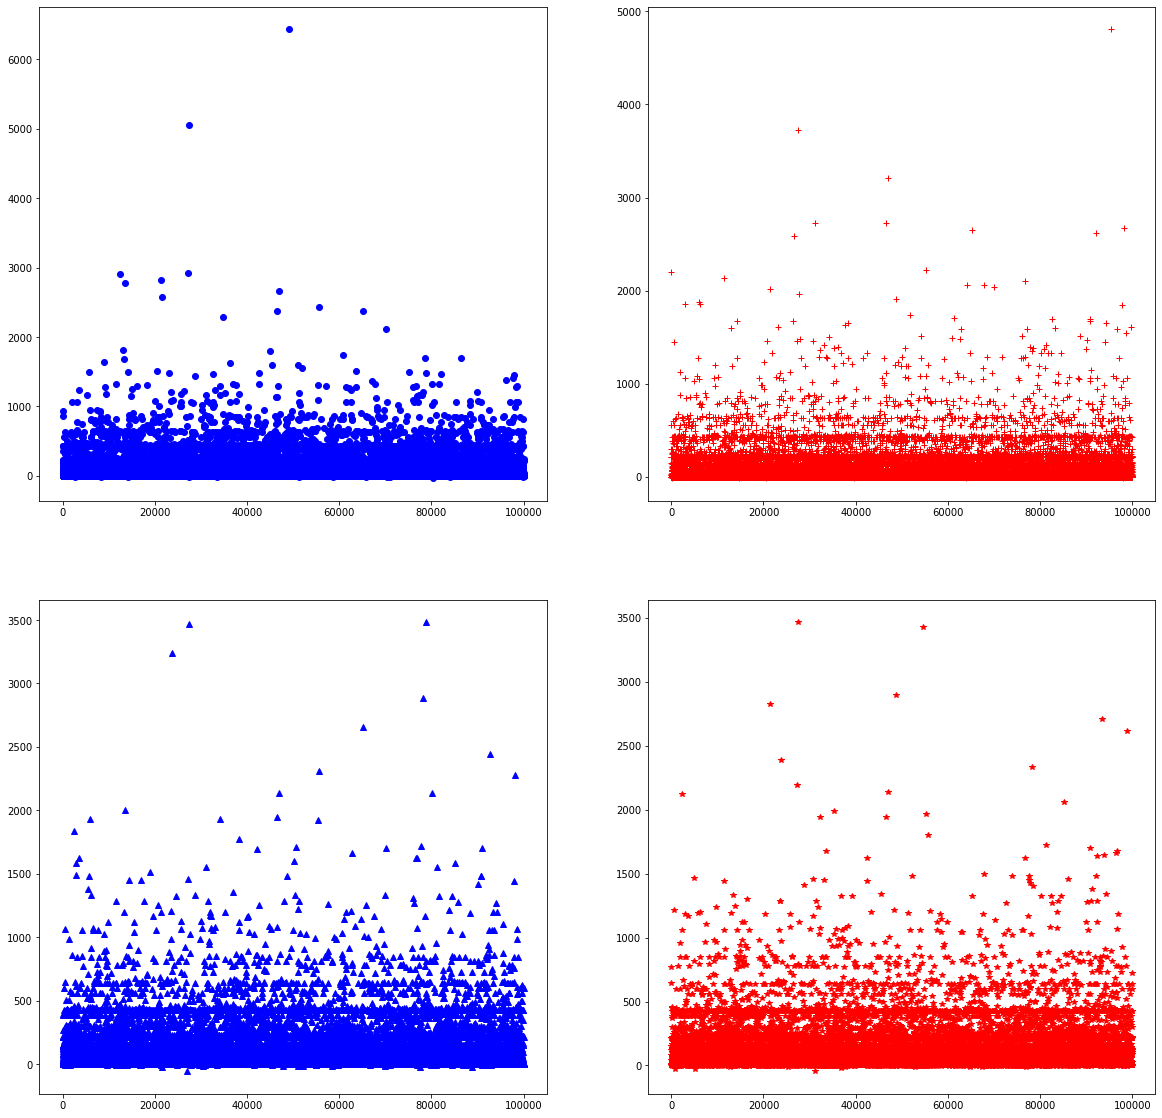

In [16]:
fig=plt.figure(figsize=(20,20))
((ax1, ax2), (ax3, ax4)) = fig.subplots(2, 2)

ax1.plot(teleData['arpu_2g_6'],"bo")
ax2.plot(teleData['arpu_2g_7'],"r+")
ax3.plot(teleData['arpu_2g_8'],"b^")
ax4.plot(teleData['arpu_2g_9'],"r*")

plt.show()

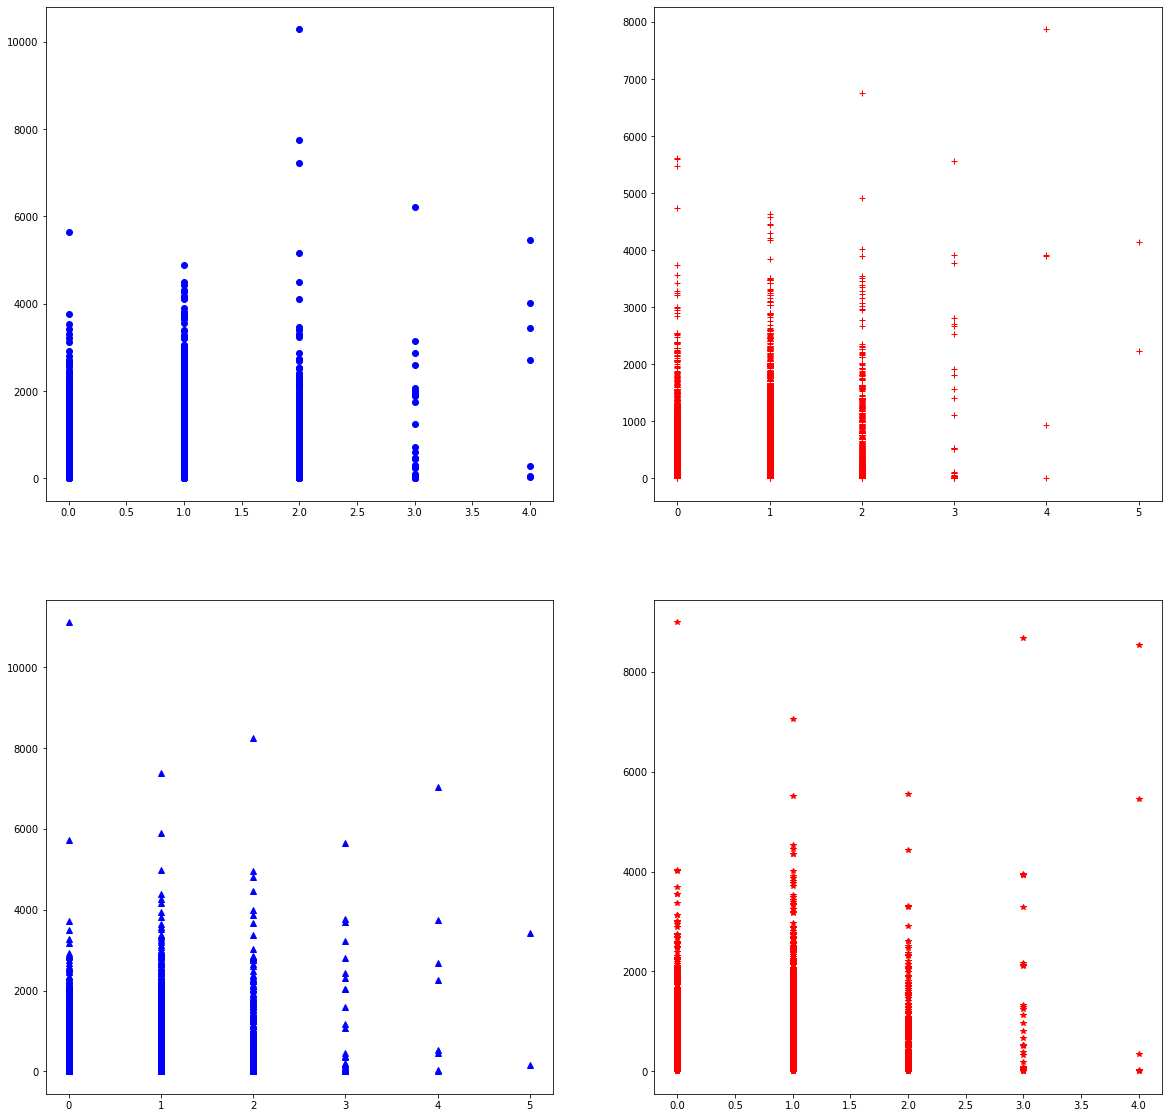

In [17]:
fig=plt.figure(figsize=(20,20))
((ax1, ax2), (ax3, ax4)) = fig.subplots(2, 2)

ax1.plot(teleData['monthly_2g_6'],teleData['vol_2g_mb_6'],"bo")
ax2.plot(teleData['monthly_2g_7'],teleData['vol_2g_mb_7'],"r+")
ax3.plot(teleData['monthly_2g_8'],teleData['vol_2g_mb_8'],"b^")
ax4.plot(teleData['monthly_2g_9'],teleData['vol_2g_mb_9'],"r*")

plt.show()

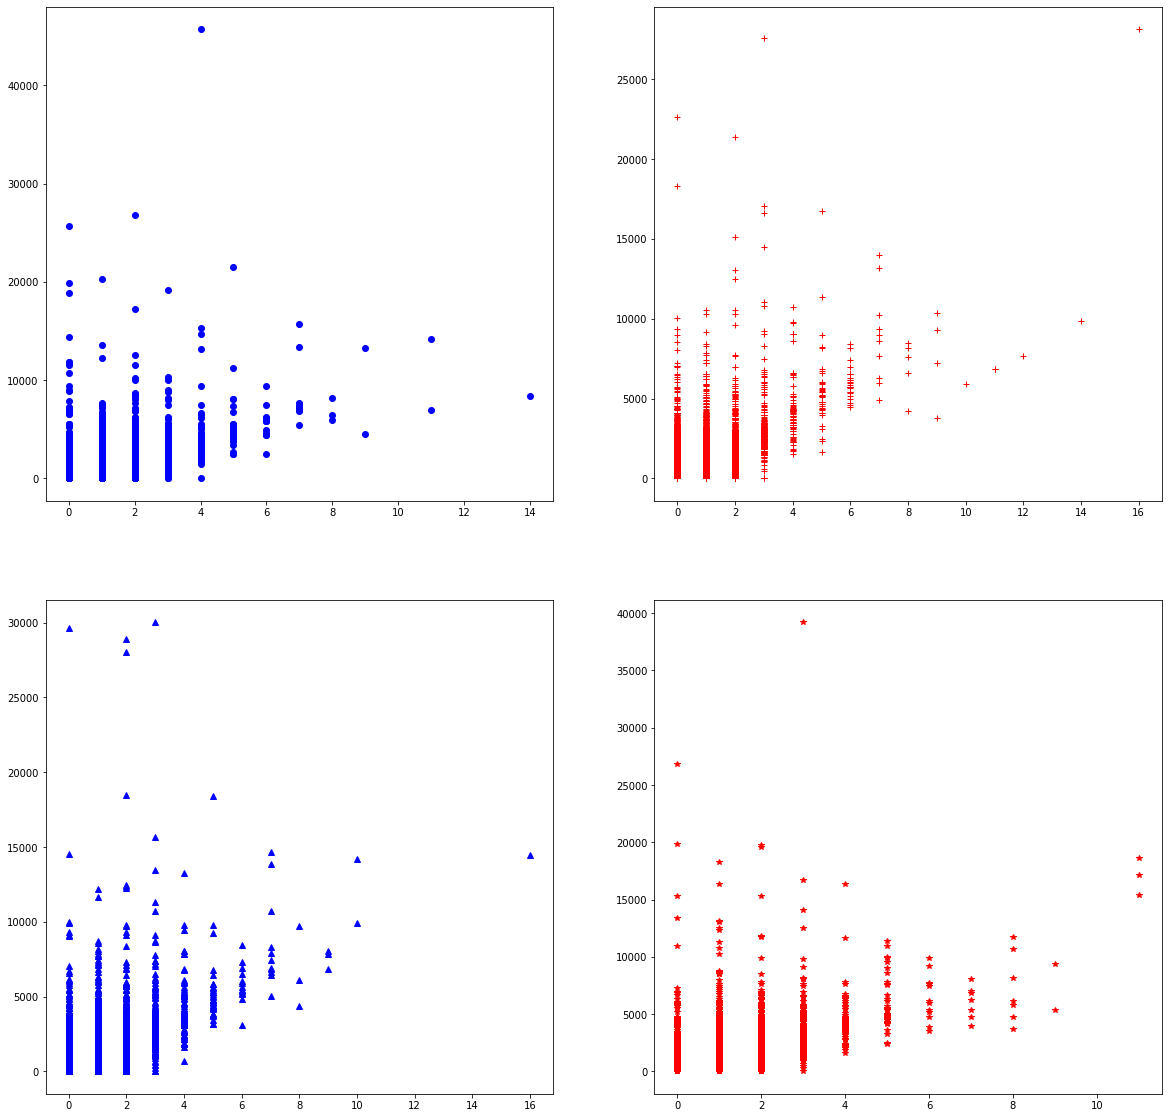

In [18]:
fig=plt.figure(figsize=(20,20))
((ax1, ax2), (ax3, ax4)) = fig.subplots(2, 2)

ax1.plot(teleData['monthly_3g_6'],teleData['vol_3g_mb_6'],"bo")
ax2.plot(teleData['monthly_3g_7'],teleData['vol_3g_mb_7'],"r+")
ax3.plot(teleData['monthly_3g_8'],teleData['vol_3g_mb_8'],"b^")
ax4.plot(teleData['monthly_3g_9'],teleData['vol_3g_mb_9'],"r*")

plt.show()

## Data Imputation

All columns where there is 20% missing values:

In [19]:
colsWith20pnull=pd.Series(  teleData.columns.where(teleData.isnull().mean()<=0.20)).dropna().tolist()
colsWith20pnull

['mobile_number',
 'circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'arpu_9',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'onnet_mou_9',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'offnet_mou_9',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_ic_mou_9',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'roam_og_mou_9',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_t2c_mou_9',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_og_mou_9',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2t_mou_9',
 's

Imputing values to 0 where the column in not a date type

In [26]:
cols_noDates=[x for x in teleData.columns if "date" not in x]
teleData_imputed=teleData[cols_noDates].fillna(0)
teleData_imputed.head(10)

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   
5     7000286308        109             0.0             0.0             0.0   
6     7001051193        109             0.0             0.0             0.0   
7     7000701601        109             0.0             0.0             0.0   
8     7001524846        109             0.0             0.0             0.0   
9     7001864400        109             0.0             0.0             0.0   

     arpu_6    arpu_7    arpu_8   arpu_9  onnet_mou_6  ...  sachet_3g_9  \
0   197.385   214.816   213.803   21.100         0.00  ...            0   
1    34.047   355.074   268.321   86.285        24.11  ...            0   
2   167.690   189.058   210.226  290.714        11.54  ...            0   
3   221.338   251.102   508.054  389.500        99.91  ...            0   
4   261.636   309.876   238.174  163.426        50.31  ...            0   
5    50.258    58.810    83.386  170.826        50.16  ...            0   
6   429.023   190.704   255.114  114.751        71.03  ...            0   
7  1069.180  1349.850  3171.480  500.000        57.84  ...            0   
8   378.721   492.223   137.362  166.787       413.69  ...            0   
9   119.518   247.435   170.231  160.042        33.89  ...            0   

   fb_user_6  fb_user_7  fb_user_8  fb_user_9   aon  aug_vbc_3g  jul_vbc_3g  \
0        1.0        1.0        1.0        0.0   968       30.40        0.00   
1        0.0        1.0        1.0        0.0  1006        0.00        0.00   
2        0.0        0.0        0.0        1.0  1103        0.00        0.00   
3        0.0        0.0        0.0        0.0  2491        0.00        0.00   
4        0.0        0.0        0.0        0.0  1526        0.00        0.00   
5        0.0        0.0        0.0        0.0  1471        0.00        0.00   
6        0.0        0.0        0.0        0.0  1673        0.00        0.00   
7        0.0        0.0        0.0        0.0   802       57.74       19.38   
8        0.0        1.0        1.0        0.0   315       21.03      910.65   
9        0.0        1.0        0.0        0.0   902        0.00        0.00   

   jun_vbc_3g  sep_vbc_3g  
0      101.20        3.58  
1        0.00        0.00  
2        4.17        0.00  
3        0.00        0.00  
4        0.00        0.00  
5        0.00        0.00  
6        0.00        0.00  
7       18.74        0.00  
8      122.16        0.00  
9        0.00        0.00  

[10 rows x 214 columns]

In [27]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print (teleData_imputed.isnull().mean())
display(teleData_imputed.describe())

mobile_number         0.0
circle_id             0.0
loc_og_t2o_mou        0.0
std_og_t2o_mou        0.0
loc_ic_t2o_mou        0.0
arpu_6                0.0
arpu_7                0.0
arpu_8                0.0
arpu_9                0.0
onnet_mou_6           0.0
onnet_mou_7           0.0
onnet_mou_8           0.0
onnet_mou_9           0.0
offnet_mou_6          0.0
offnet_mou_7          0.0
offnet_mou_8          0.0
offnet_mou_9          0.0
roam_ic_mou_6         0.0
roam_ic_mou_7         0.0
roam_ic_mou_8         0.0
roam_ic_mou_9         0.0
roam_og_mou_6         0.0
roam_og_mou_7         0.0
roam_og_mou_8         0.0
roam_og_mou_9         0.0
loc_og_t2t_mou_6      0.0
loc_og_t2t_mou_7      0.0
loc_og_t2t_mou_8      0.0
loc_og_t2t_mou_9      0.0
loc_og_t2m_mou_6      0.0
loc_og_t2m_mou_7      0.0
loc_og_t2m_mou_8      0.0
loc_og_t2m_mou_9      0.0
loc_og_t2f_mou_6      0.0
loc_og_t2f_mou_7      0.0
loc_og_t2f_mou_8      0.0
loc_og_t2f_mou_9      0.0
loc_og_t2c_mou_6      0.0
loc_og_t2c_m

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   9.999900e+04    99999.0         99999.0         99999.0   
mean    7.001207e+09      109.0             0.0             0.0   
std     6.956694e+05        0.0             0.0             0.0   
min     7.000000e+09      109.0             0.0             0.0   
25%     7.000606e+09      109.0             0.0             0.0   
50%     7.001205e+09      109.0             0.0             0.0   
75%     7.001812e+09      109.0             0.0             0.0   
max     7.002411e+09      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9  \
count         99999.0  99999.000000  99999.000000  99999.000000  99999.000000   
mean              0.0    282.987358    278.536648    279.154731    261.645069   
std               0.0    328.439770    338.156291    344.474791    341.998630   
min               0.0  -2258.709000  -2014.045000   -945.808000  -1899.505000   
25%               0.0     93.411500     86.980500     84.126000     62.685000   
50%               0.0    197.704000    191.640000    192.080000    176.849000   
75%               0.0    371.060000    365.344500    369.370500    353.466500   
max               0.0  27731.088000  35145.834000  33543.624000  38805.617000   

        onnet_mou_6  ...   sachet_3g_9     fb_user_6     fb_user_7  \
count  99999.000000  ...  99999.000000  99999.000000  99999.000000   
mean     127.183397  ...      0.084581      0.230002      0.232382   
std      292.433718  ...      0.650457      0.420836      0.422354   
min        0.000000  ...      0.000000      0.000000      0.000000   
25%        5.430000  ...      0.000000      0.000000      0.000000   
50%       30.980000  ...      0.000000      0.000000      0.000000   
75%      112.610000  ...      0.000000      0.000000      0.000000   
max     7376.710000  ...     49.000000      1.000000      1.000000   

          fb_user_8     fb_user_9           aon    aug_vbc_3g    jul_vbc_3g  \
count  99999.000000  99999.000000  99999.000000  99999.000000  99999.000000   
mean       0.234632      0.223182   1219.854749     68.170248     66.839062   
std        0.423771      0.416382    954.733842    267.580450    271.201856   
min        0.000000      0.000000    180.000000      0.000000      0.000000   
25%        0.000000      0.000000    467.000000      0.000000      0.000000   
50%        0.000000      0.000000    863.000000      0.000000      0.000000   
75%        0.000000      0.000000   1807.500000      0.000000      0.000000   
max        1.000000      1.000000   4337.000000  12916.220000   9165.600000   

         jun_vbc_3g    sep_vbc_3g  
count  99999.000000  99999.000000  
mean      60.021204      3.299373  
std      253.938223     32.408353  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      0.000000  
75%        0.000000      0.000000  
max    11166.210000   2618.570000  

[8 rows x 214 columns]

We can see that **loc_og_t2o_mou std_og_t2o_mou loc_ic_t2o_mou** have zero as the value, so we can drop them all. same goes for other columns that have only one value

## Outlier Treatment

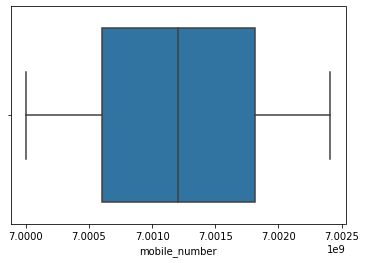

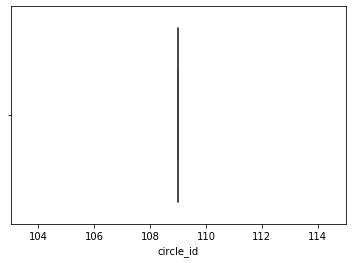

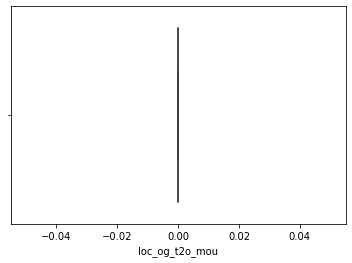

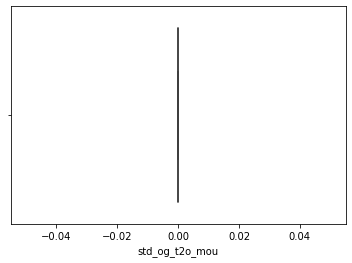

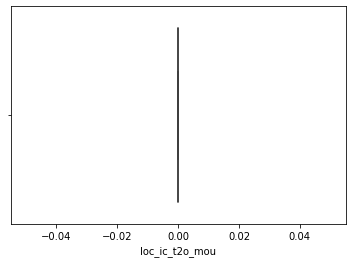

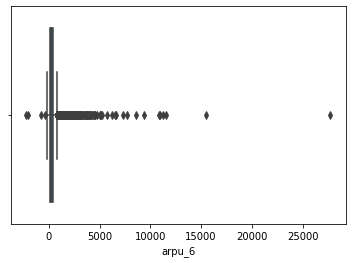

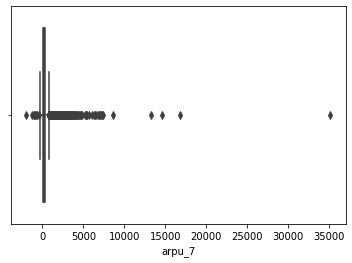

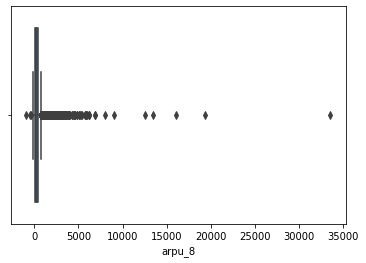

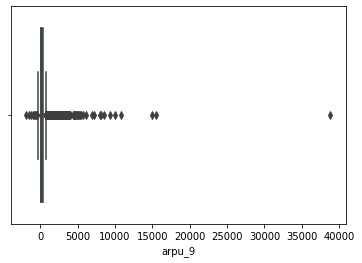

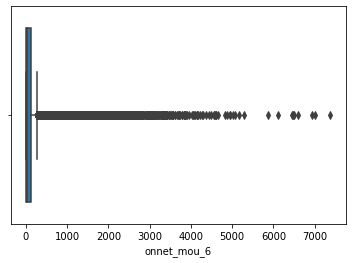

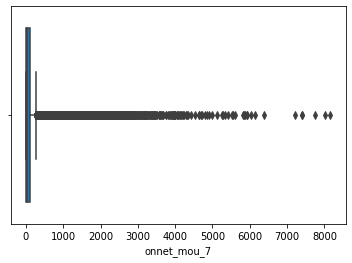

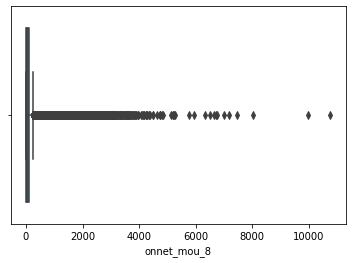

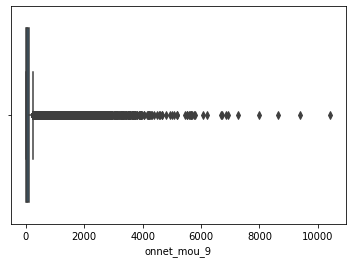

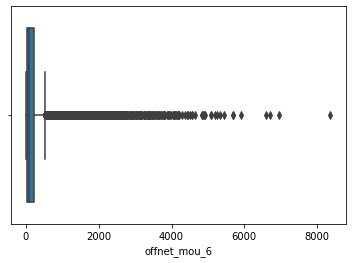

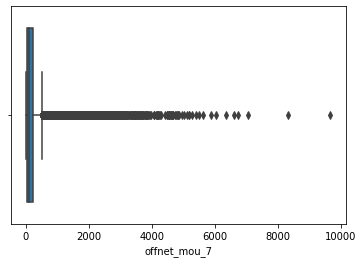

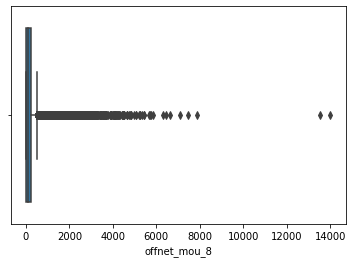

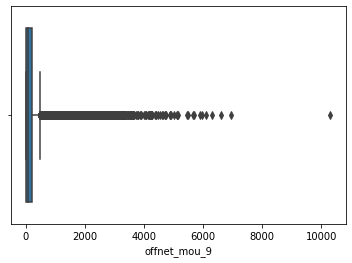

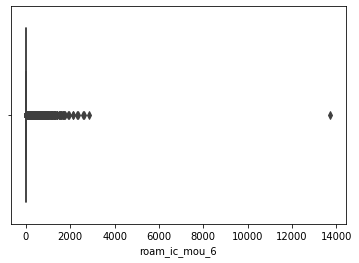

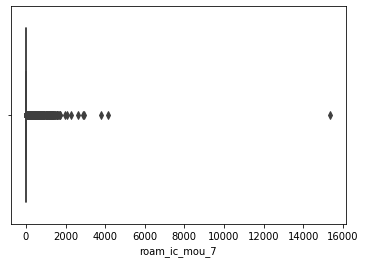

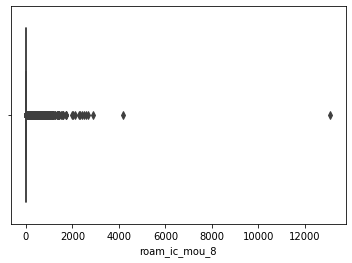

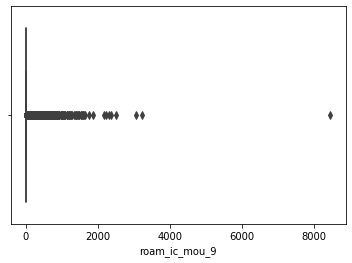

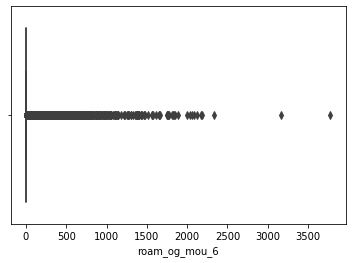

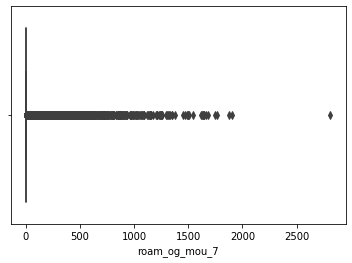

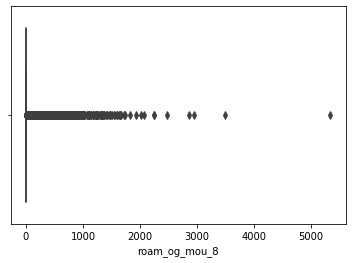

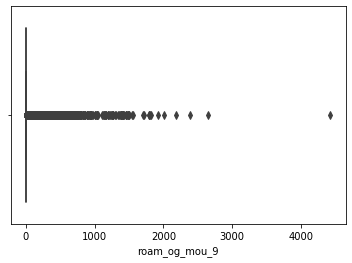

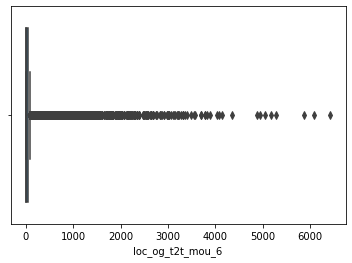

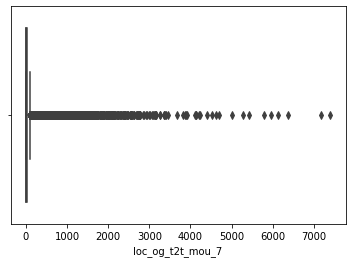

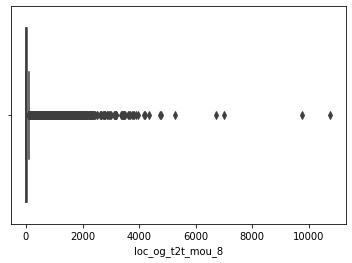

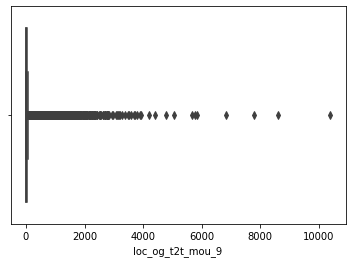

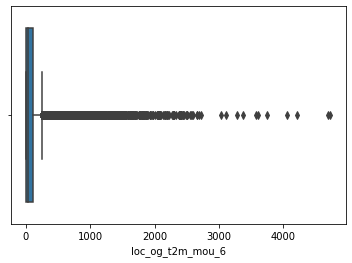

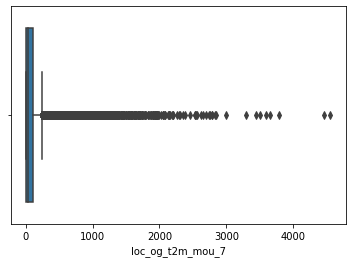

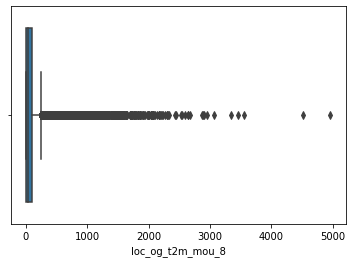

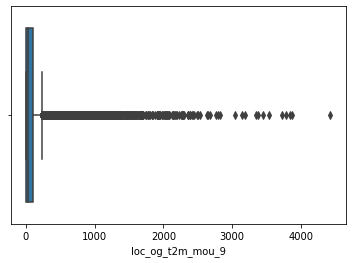

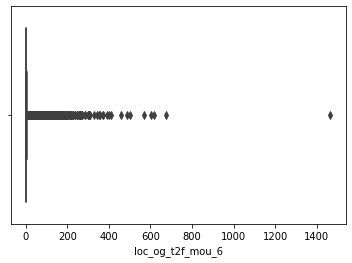

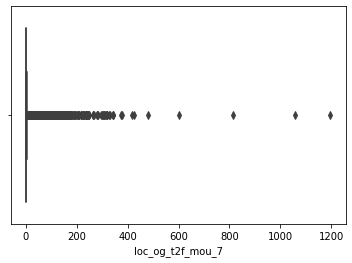

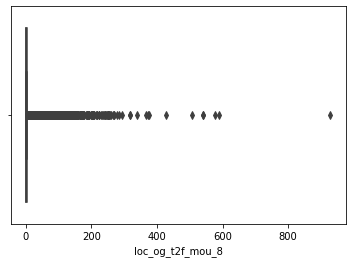

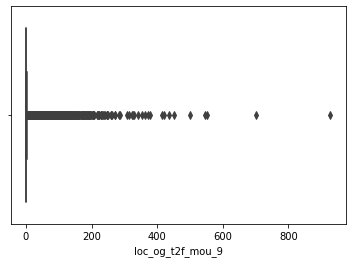

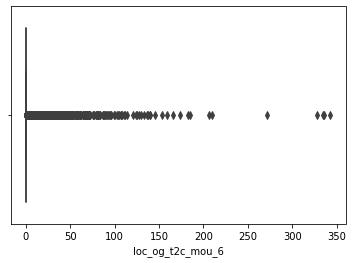

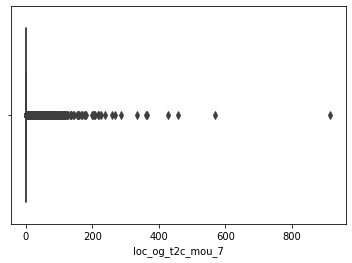

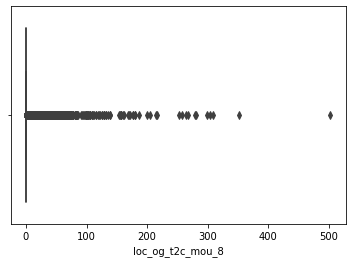

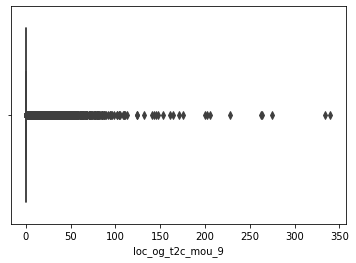

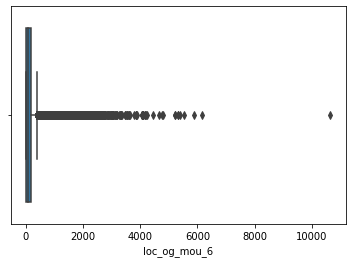

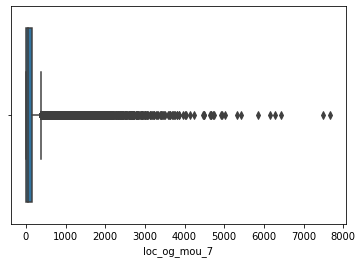

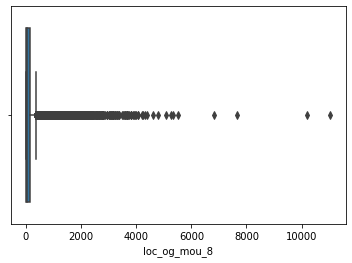

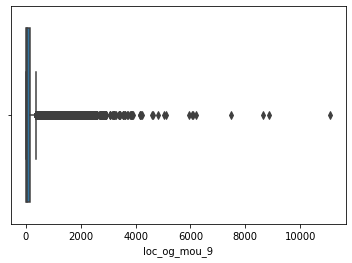

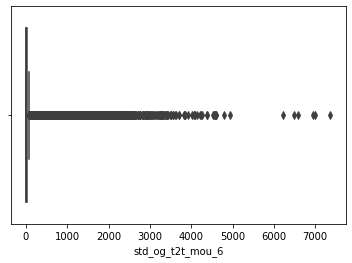

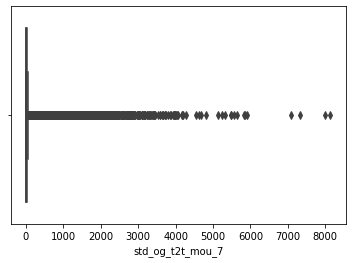

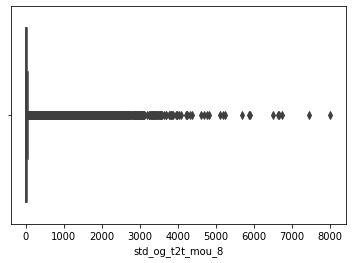

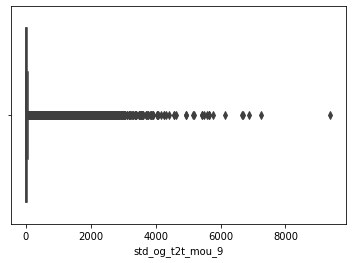

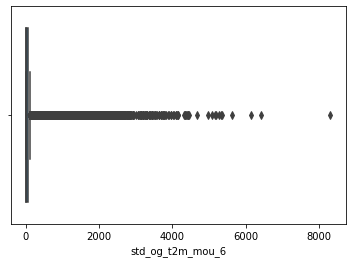

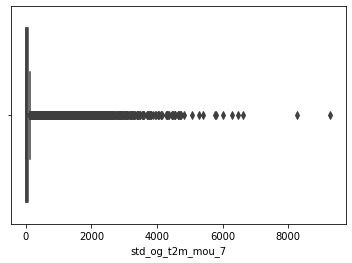

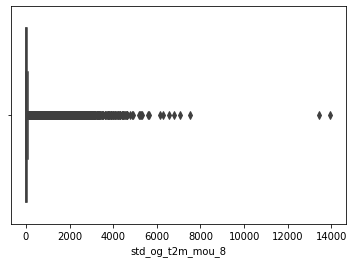

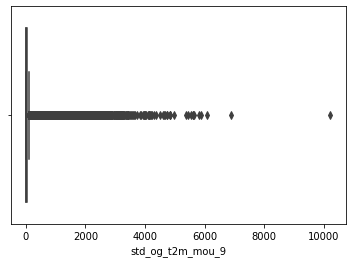

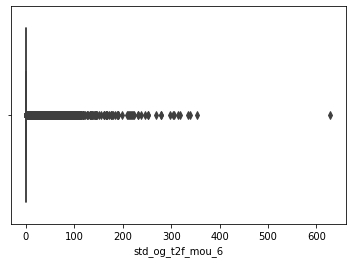

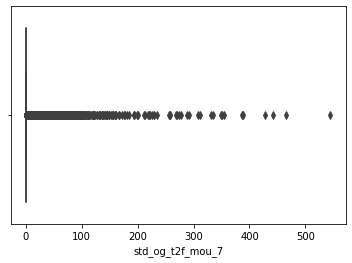

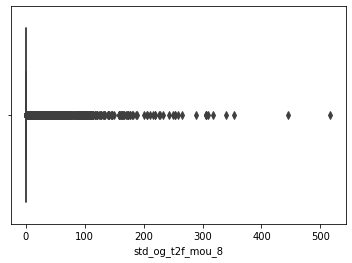

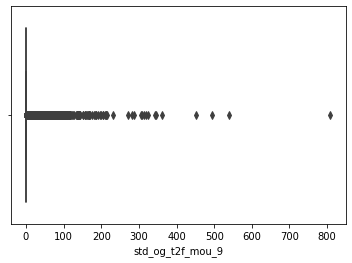

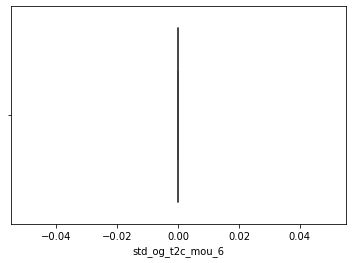

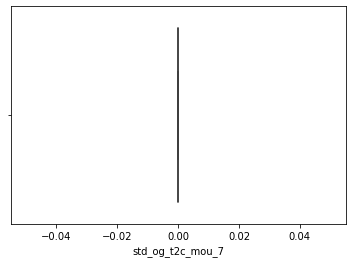

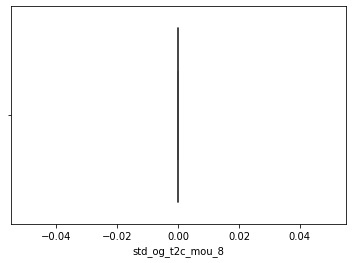

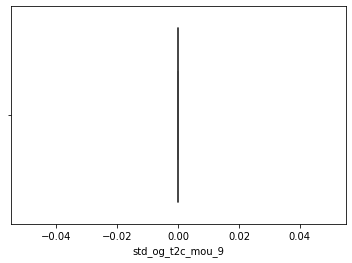

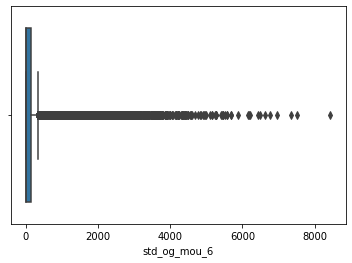

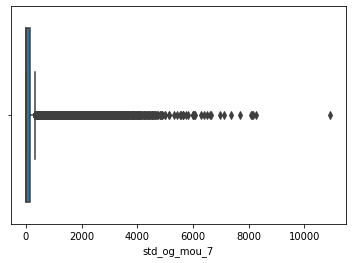

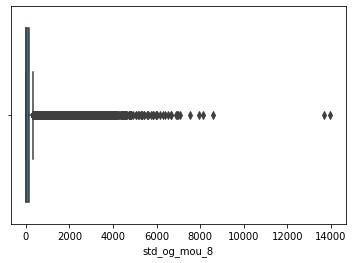

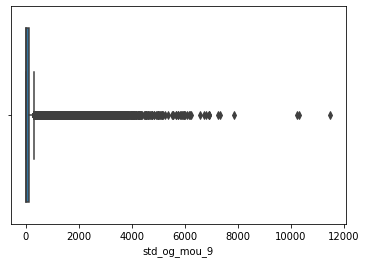

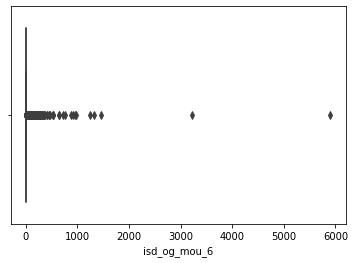

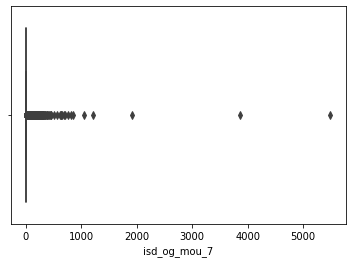

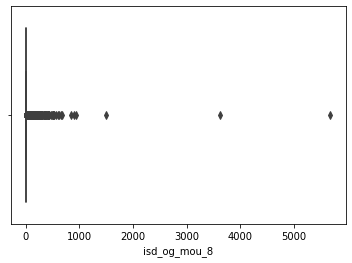

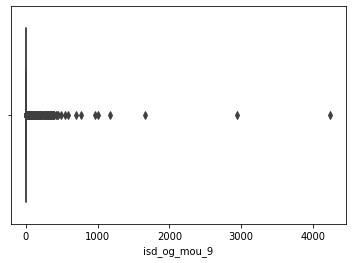

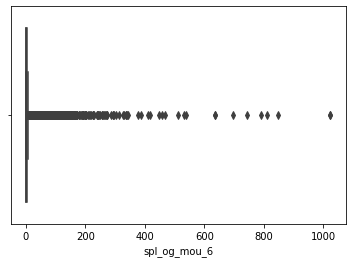

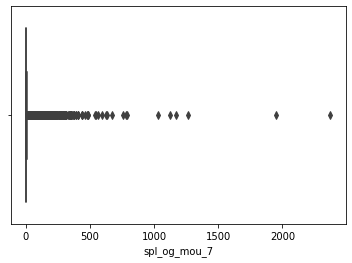

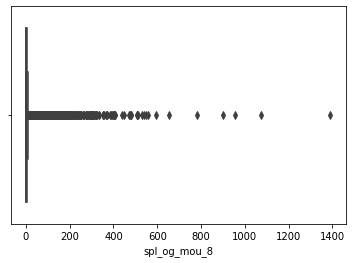

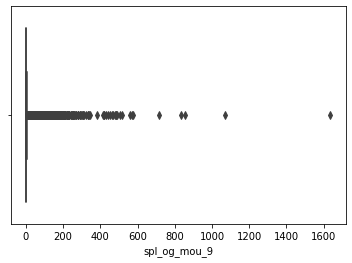

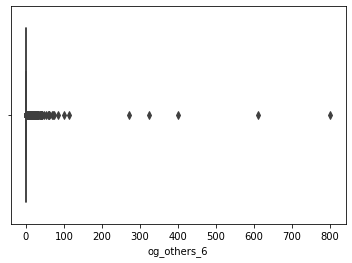

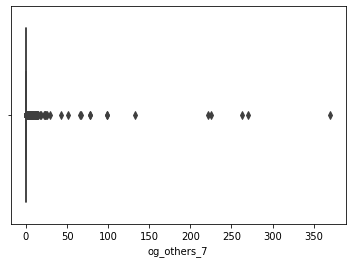

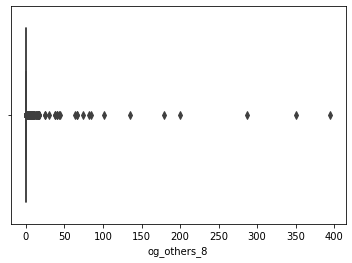

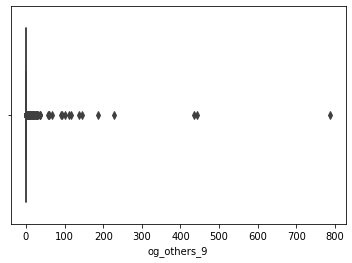

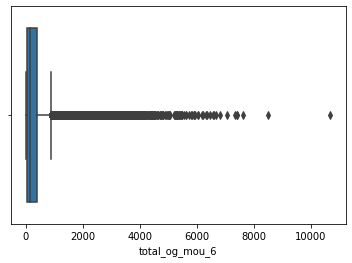

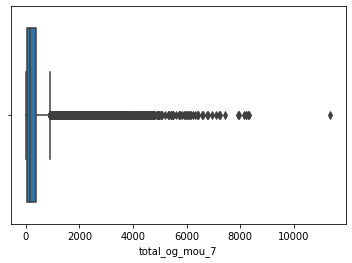

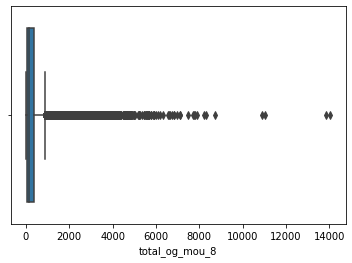

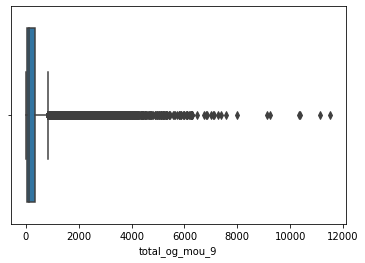

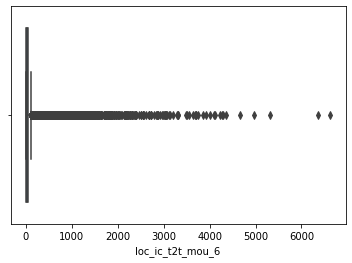

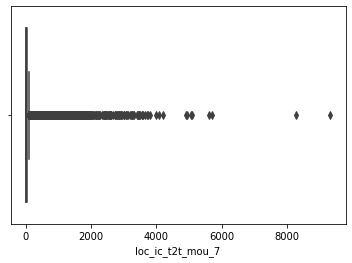

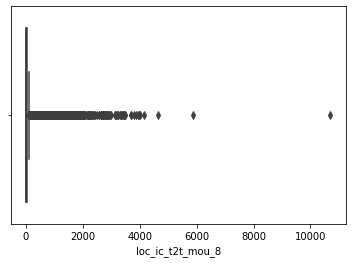

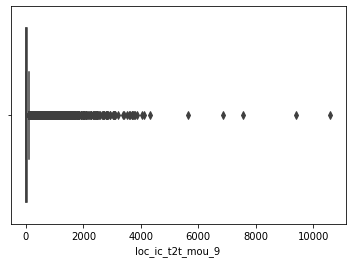

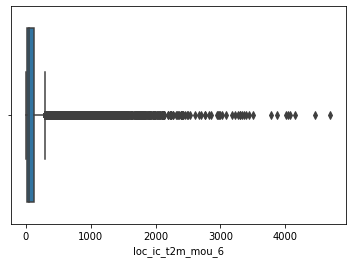

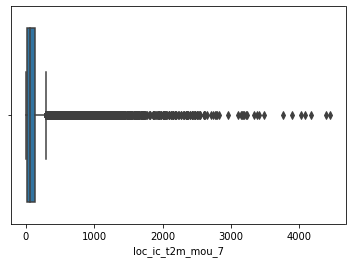

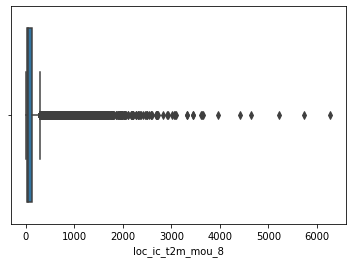

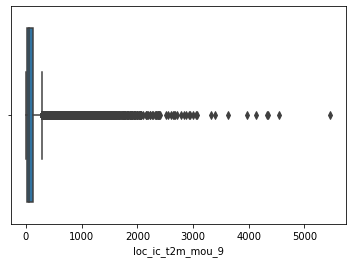

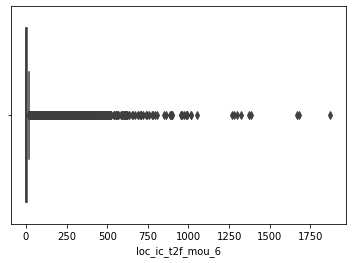

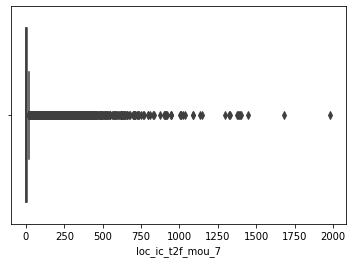

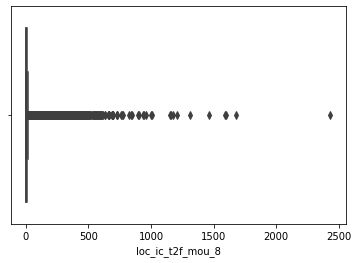

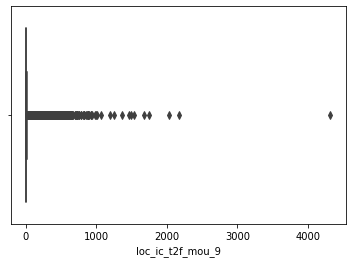

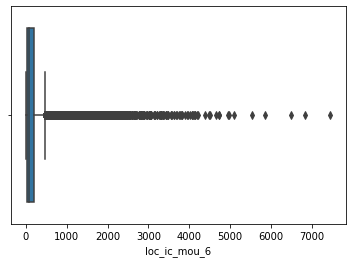

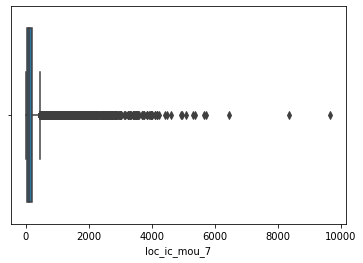

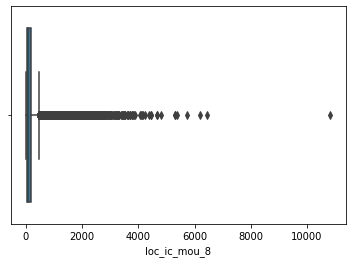

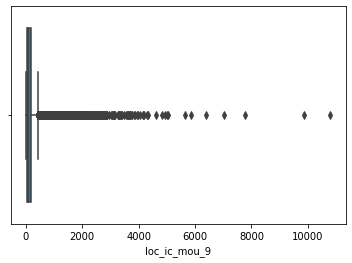

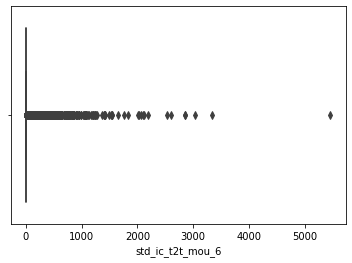

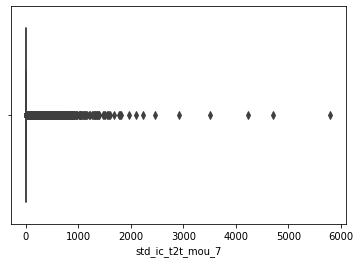

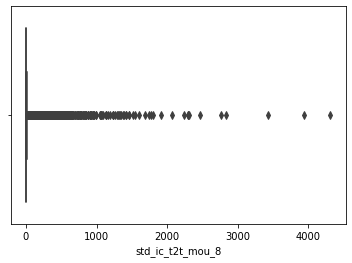

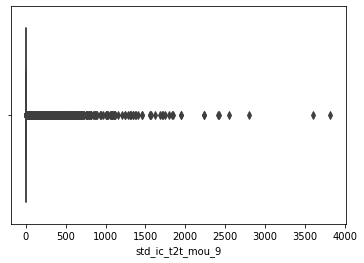

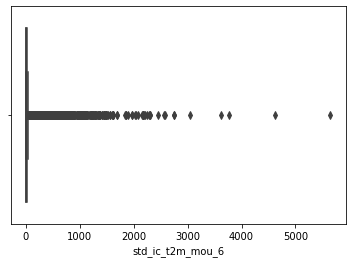

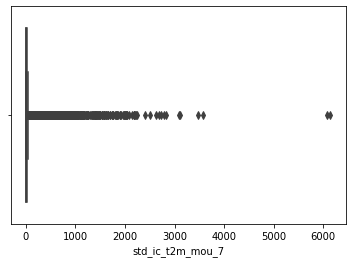

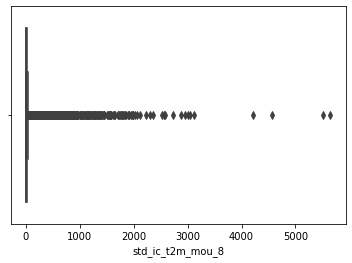

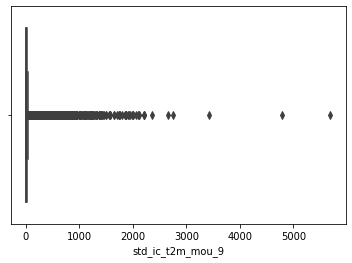

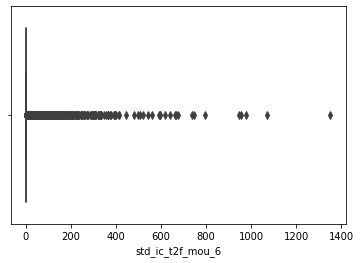

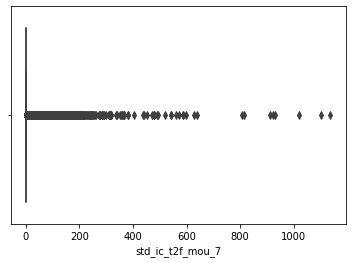

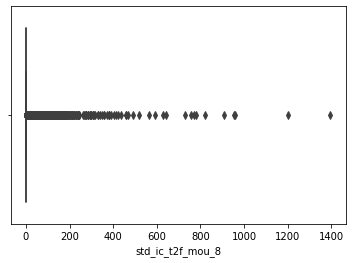

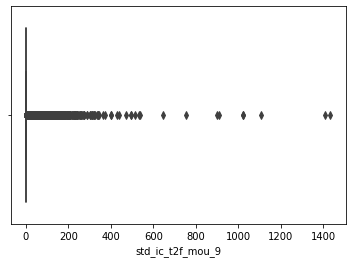

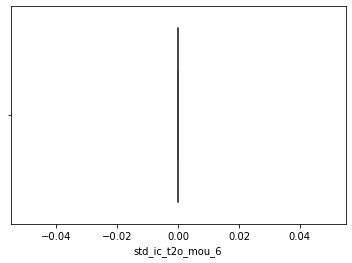

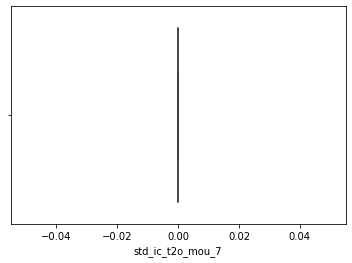

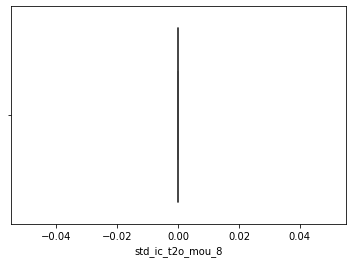

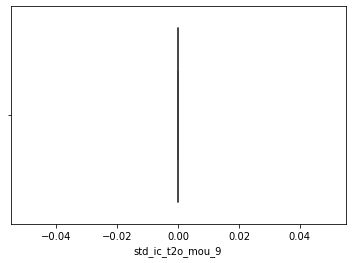

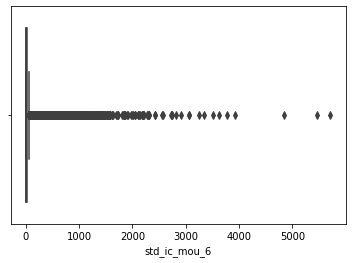

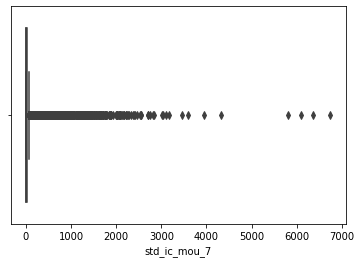

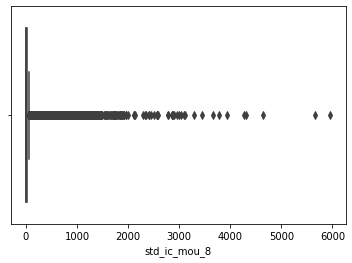

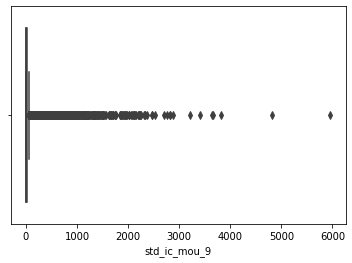

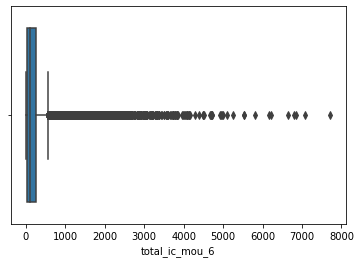

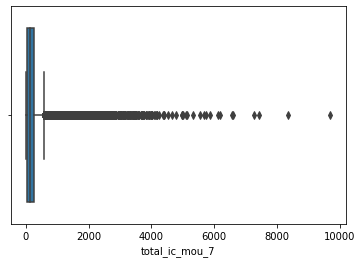

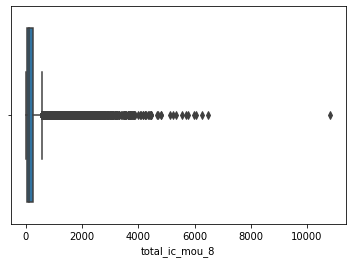

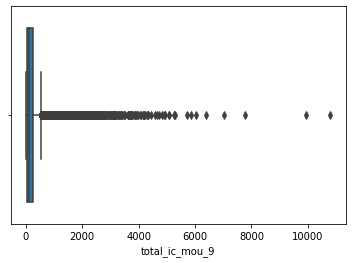

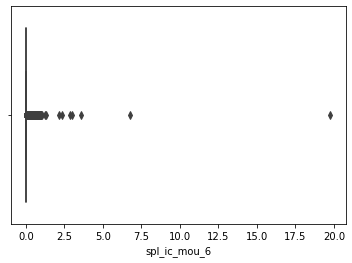

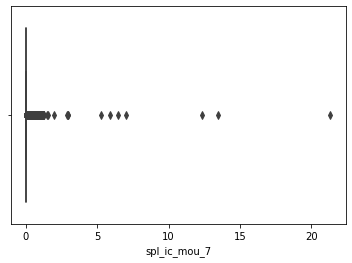

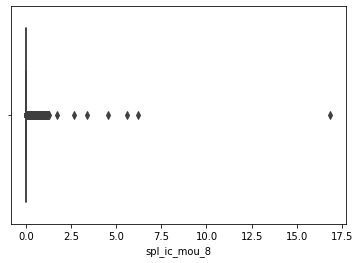

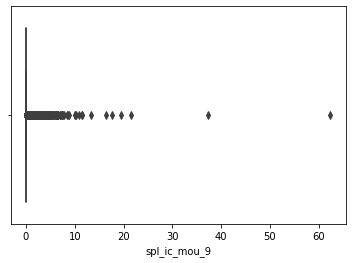

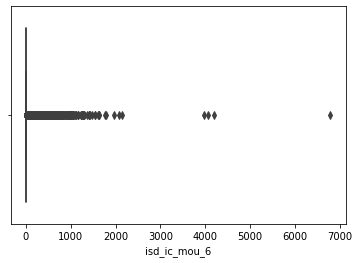

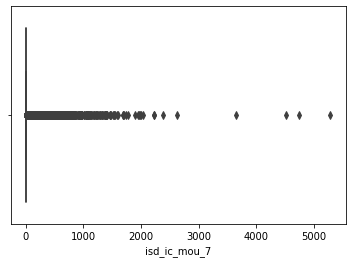

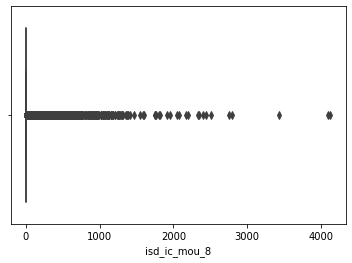

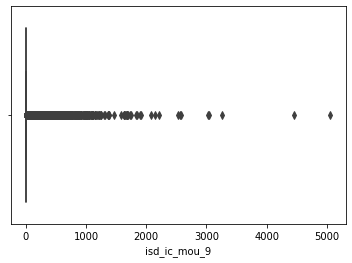

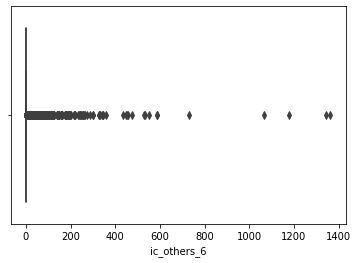

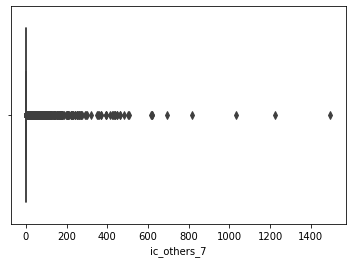

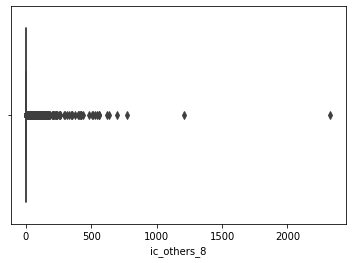

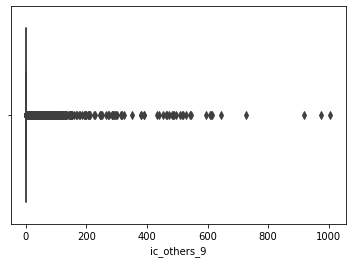

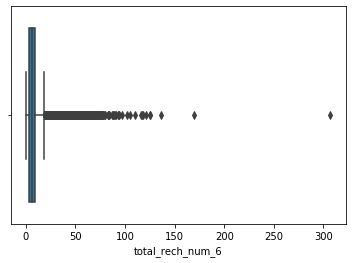

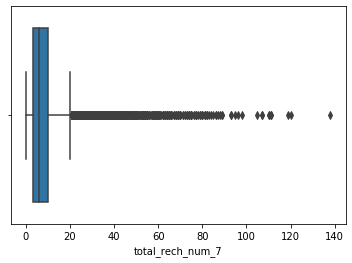

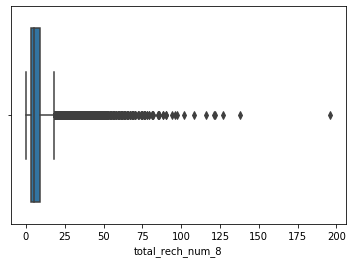

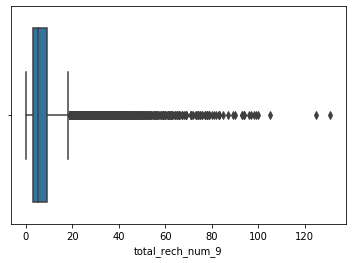

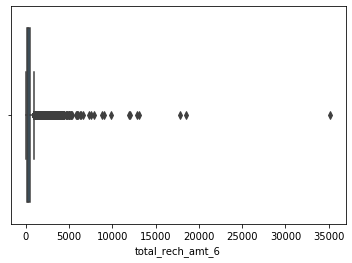

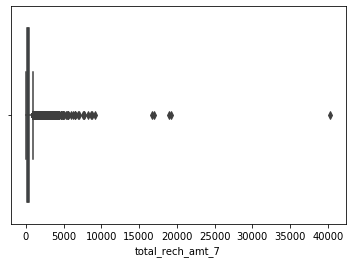

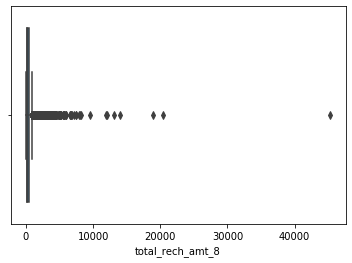

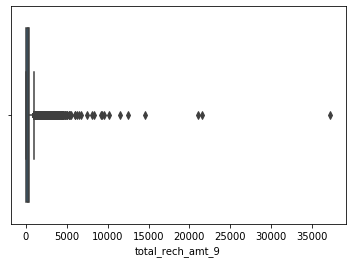

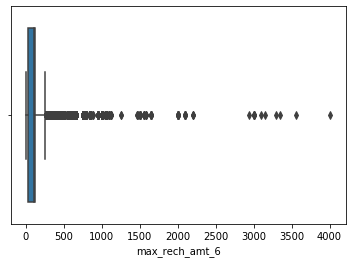

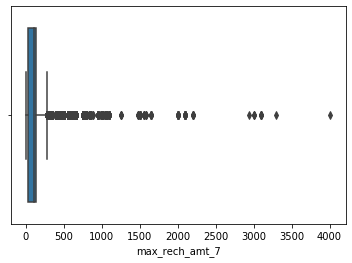

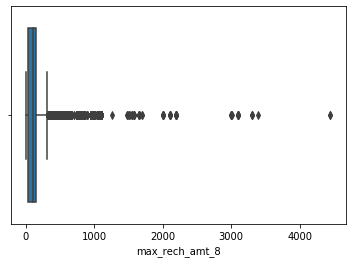

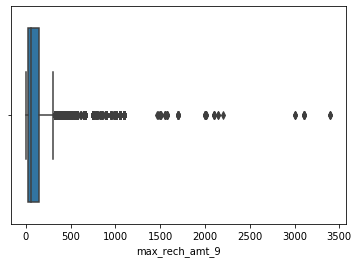

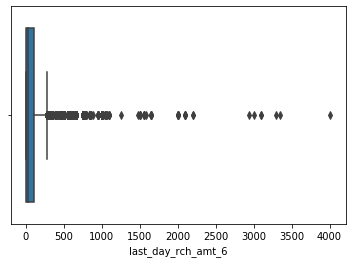

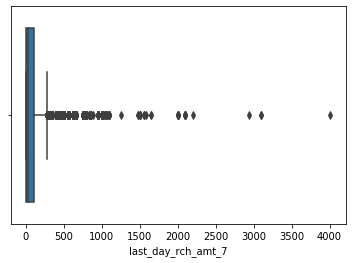

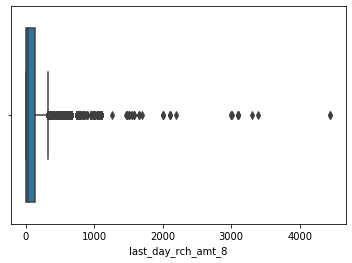

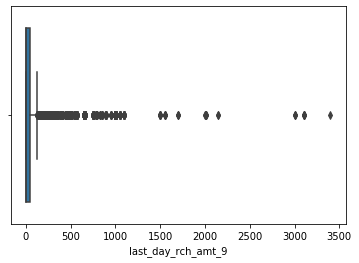

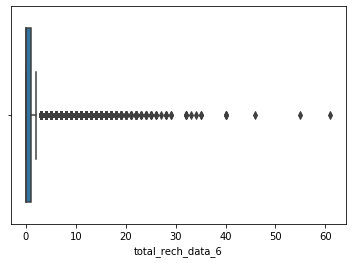

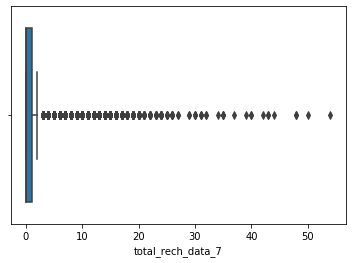

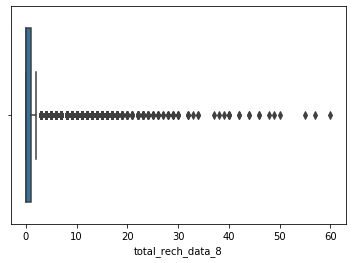

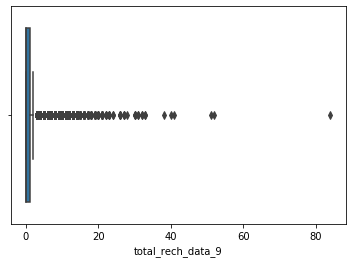

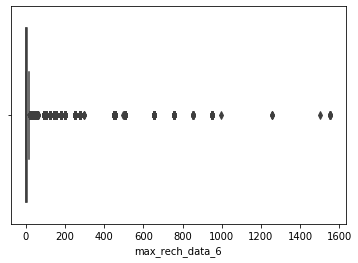

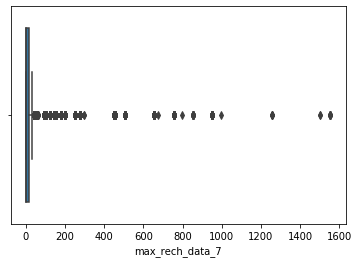

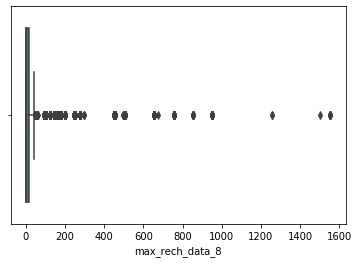

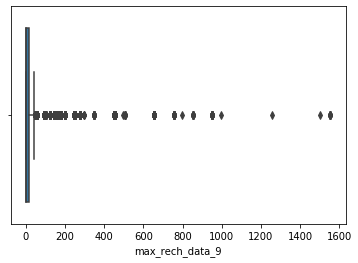

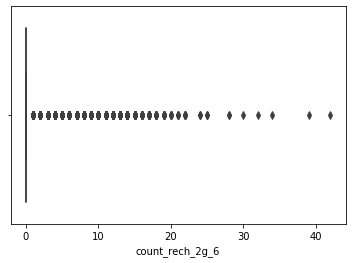

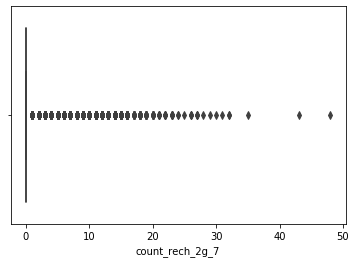

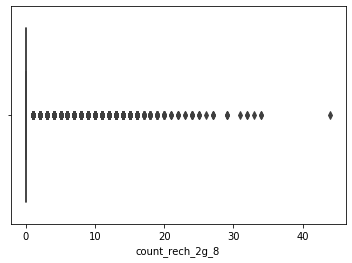

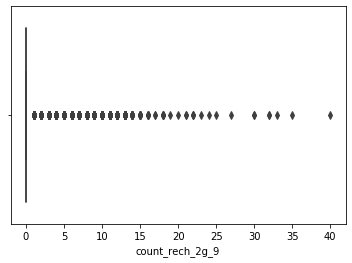

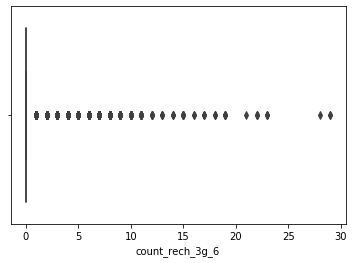

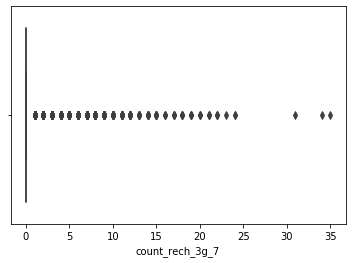

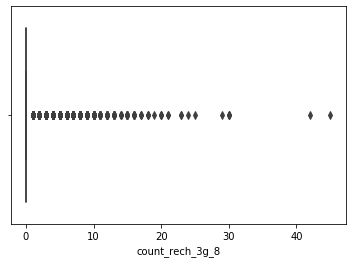

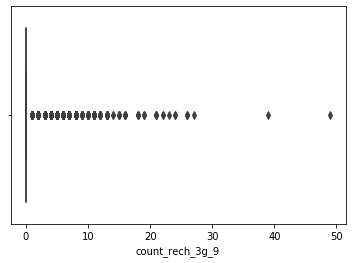

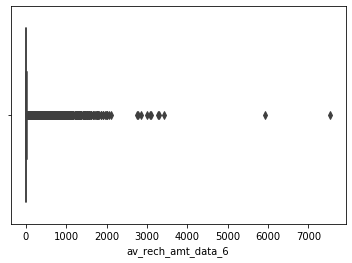

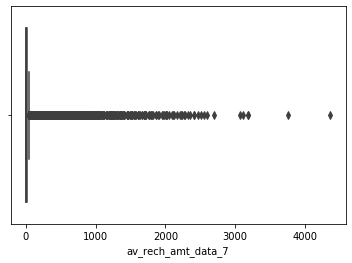

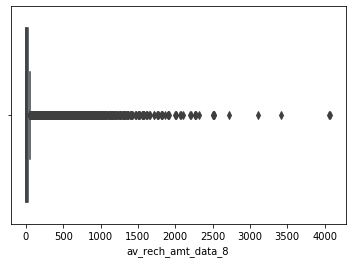

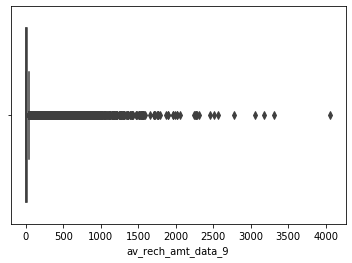

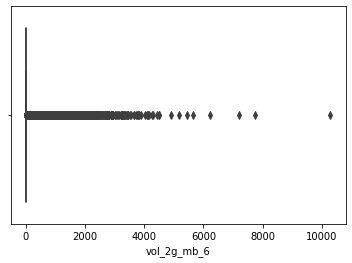

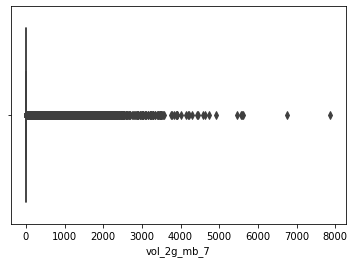

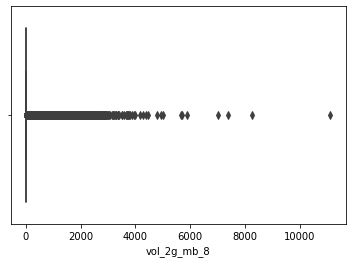

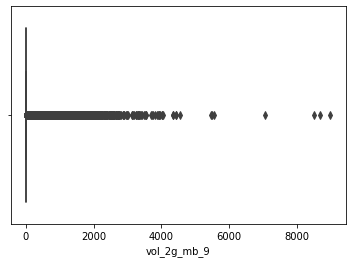

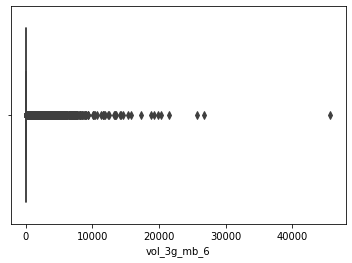

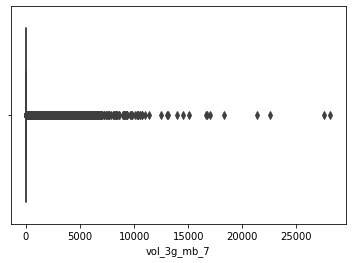

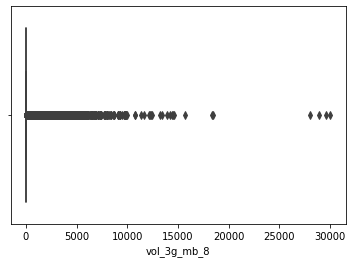

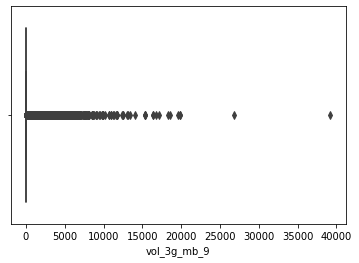

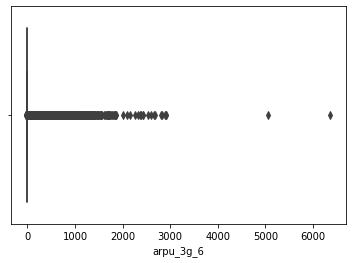

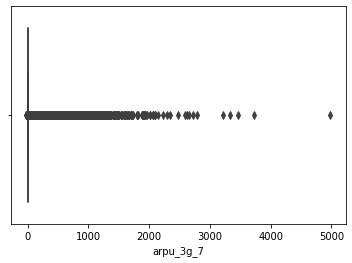

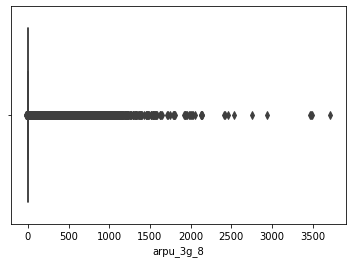

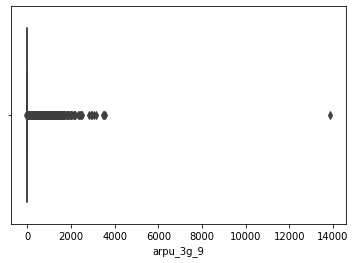

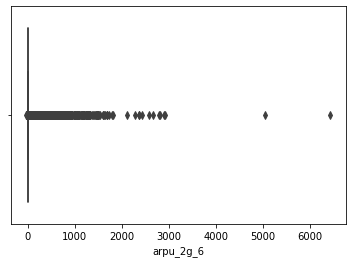

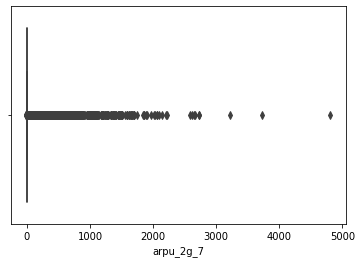

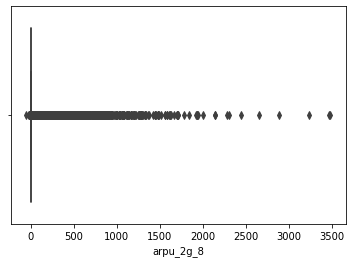

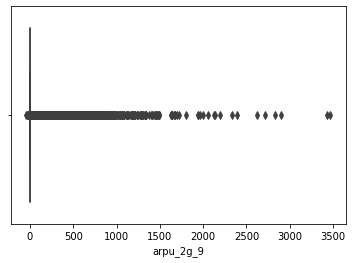

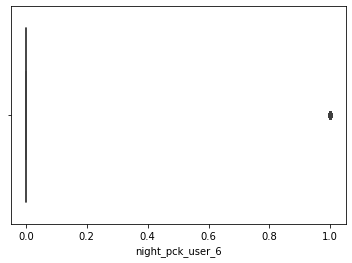

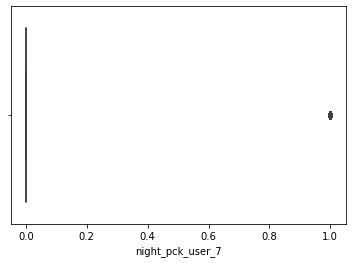

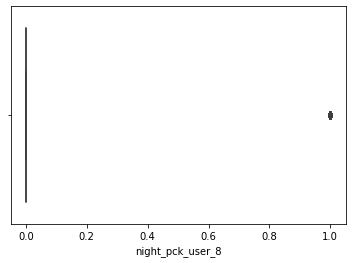

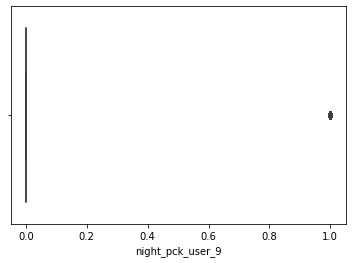

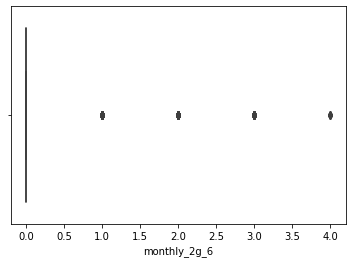

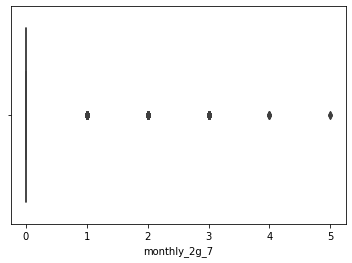

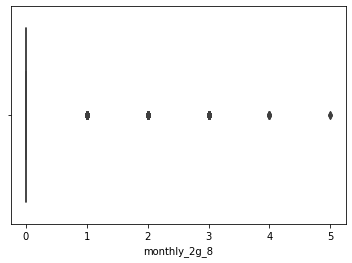

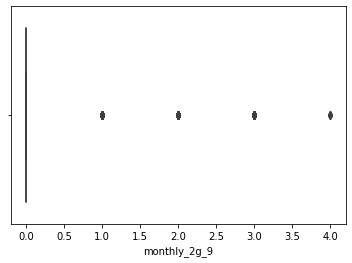

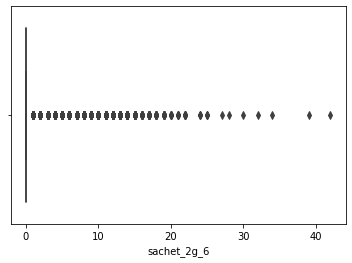

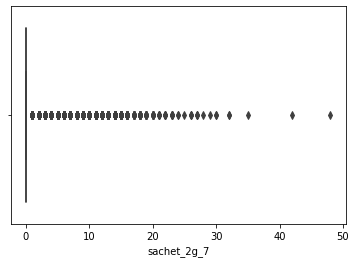

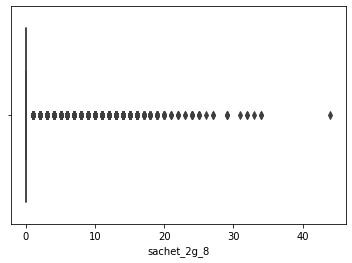

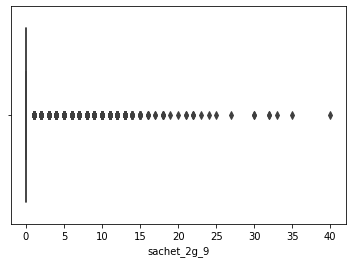

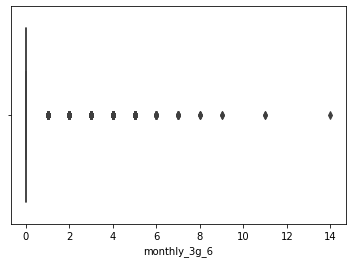

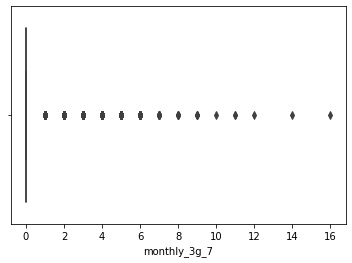

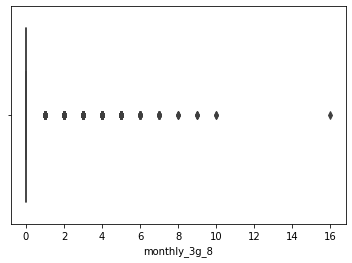

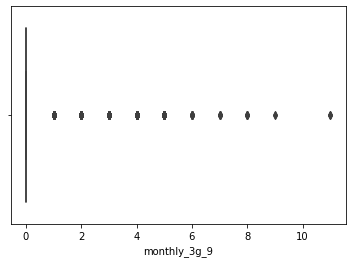

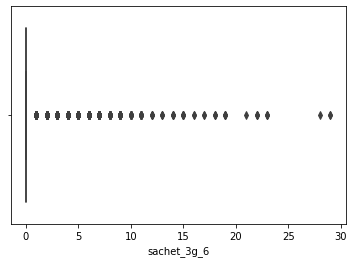

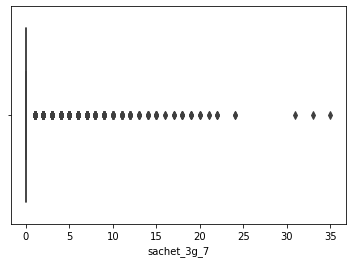

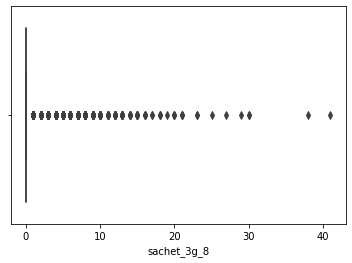

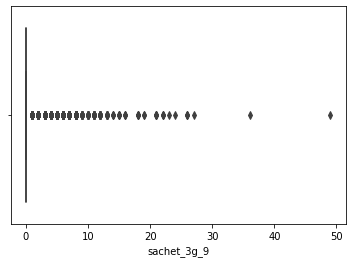

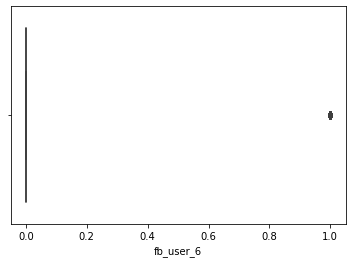

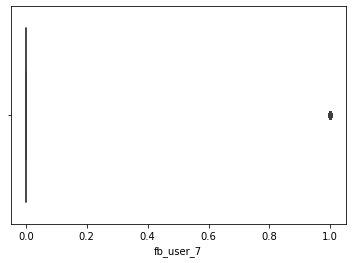

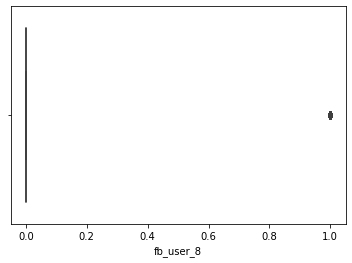

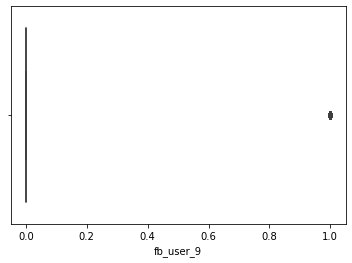

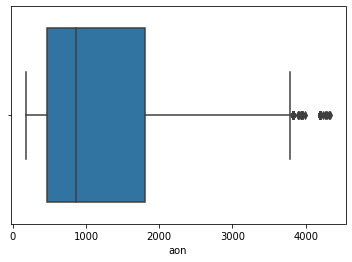

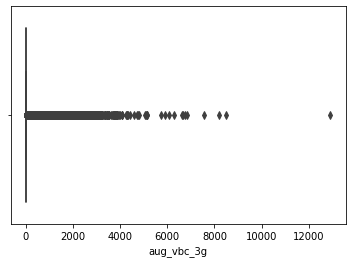

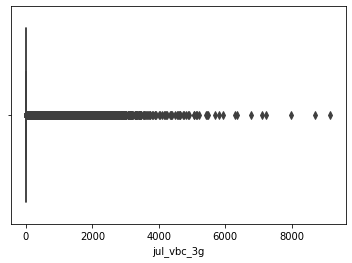

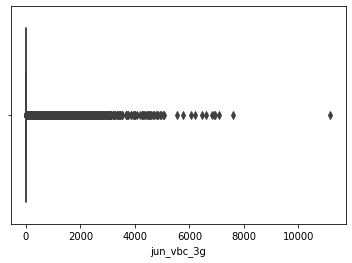

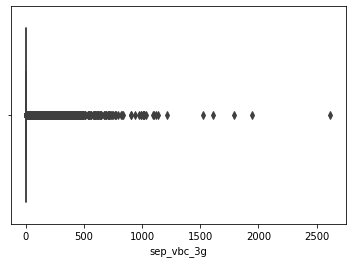

In [28]:
for col in (teleData_imputed.columns).tolist():
    sns.boxplot(col,data=teleData_imputed,)
    plt.show()

In [29]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(teleData_imputed.describe())

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   9.999900e+04    99999.0         99999.0         99999.0   
mean    7.001207e+09      109.0             0.0             0.0   
std     6.956694e+05        0.0             0.0             0.0   
min     7.000000e+09      109.0             0.0             0.0   
25%     7.000606e+09      109.0             0.0             0.0   
50%     7.001205e+09      109.0             0.0             0.0   
75%     7.001812e+09      109.0             0.0             0.0   
max     7.002411e+09      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9  \
count         99999.0  99999.000000  99999.000000  99999.000000  99999.000000   
mean              0.0    282.987358    278.536648    279.154731    261.645069   
std               0.0    328.439770    338.156291    344.474791    341.998630   
min               0.0  -2258.709000  -2014.045000   -945.808000  -1899.505000   
25%               0.0     93.411500     86.980500     84.126000     62.685000   
50%               0.0    197.704000    191.640000    192.080000    176.849000   
75%               0.0    371.060000    365.344500    369.370500    353.466500   
max               0.0  27731.088000  35145.834000  33543.624000  38805.617000   

        onnet_mou_6   onnet_mou_7   onnet_mou_8   onnet_mou_9  offnet_mou_6  \
count  99999.000000  99999.000000  99999.000000  99999.000000  99999.000000   
mean     127.183397    128.512397    125.864313    120.210311    190.142776   
std      292.433718    303.869995    302.023240    298.331154    312.928229   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        5.430000      4.880000      4.090000      2.190000     28.760000   
50%       30.980000     29.230000     28.040000     23.840000     89.680000   
75%      112.610000    108.880000    106.740000     99.090000    222.535000   
max     7376.710000   8157.780000  10752.560000  10427.460000   8362.360000   

       offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
count  99999.000000  99999.000000  99999.000000   99999.000000   99999.000000   
mean     189.441086    186.002904    175.595457       9.558277       6.873981   
std      321.759659    321.325854    310.968398      71.403643      72.029965   
min        0.000000      0.000000      0.000000       0.000000       0.000000   
25%       26.650000     23.840000     16.030000       0.000000       0.000000   
50%       85.440000     83.130000     74.680000       0.000000       0.000000   
75%      217.830000    215.500000    202.830000       0.000000       0.000000   
max     9667.130000  14007.340000  10310.760000   13724.380000   15371.040000   

       roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
count   99999.000000   99999.000000   99999.000000   99999.000000   
mean        6.900761       5.852505      13.363643       9.439823   
std        66.558003      54.906445      70.074931      57.347933   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max     13095.360000    8464.030000    3775.110000    2812.040000   

       roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   99999.000000   99999.000000      99999.000000      99999.000000   
mean        9.435597       7.892887         45.246387         44.679599   
std        62.989180      56.176090        148.140370        152.555137   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          0.990000          1.000000   
50%         0.000000       0.000000         10.680000         10.430000   
75%         0.000000       0.000000         38.820000         37.890000   
max      

In [ ]:
sns.pairplot(teleData_imputed)

We will take care of all outliers during the data preparation after filtering out the high valued customers

# Data Preperation

Finding the high values customers:
1. Creating a new columns that has average of the revenues of 6th and 7th month
2. Finding the 70th percentile and above.
3. Filtering the data to get the High Valued customers


As we can see that all the Average Revenue Columns have no null values, we can proceed forward with finding the Average
1. arpu_6        ---              99999 non-null float64
2. arpu_7        ---              99999 non-null float64
3. arpu_8        ---              99999 non-null float64
4. arpu_9        ---              99999 non-null float64

In [39]:
teleData_imputed['avg_6_7']=(teleData_imputed["total_rech_amt_6"]+teleData_imputed["total_rech_amt_7"]+(teleData_imputed["av_rech_amt_data_6"]*(teleData_imputed["count_rech_3g_6"]+teleData_imputed["count_rech_2g_6"]))+(teleData_imputed["av_rech_amt_data_7"]*(teleData_imputed["count_rech_3g_7"]+teleData_imputed["count_rech_2g_7"])))/

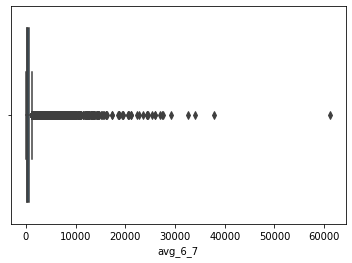

In [40]:
sns.boxplot(teleData_imputed['avg_6_7'])

In [41]:
percentile70th= teleData_imputed['avg_6_7'].quantile(0.70)
print("The 70th percentile average revenue is "+ str(percentile70th))

The 70th percentile average revenue is 478.0


In [42]:
teleData_HighValuesCustomers= teleData_imputed[teleData_imputed['avg_6_7']>=percentile70th]
teleData_HighValuesCustomers.shape

(30001, 215)

Taking a look into the High Valued customers dataset:

In [43]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(teleData_HighValuesCustomers.head(10))

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0      7000842753        109             0.0             0.0             0.0   
7      7000701601        109             0.0             0.0             0.0   
8      7001524846        109             0.0             0.0             0.0   
21     7002124215        109             0.0             0.0             0.0   
23     7000887461        109             0.0             0.0             0.0   
33     7000149764        109             0.0             0.0             0.0   
38     7000815202        109             0.0             0.0             0.0   
41     7000721289        109             0.0             0.0             0.0   
48     7000294396        109             0.0             0.0             0.0   
53     7002188521        109             0.0             0.0             0.0   

      arpu_6    arpu_7    arpu_8    arpu_9  onnet_mou_6  onnet_mou_7  \
0    197.385   214.816   213.803    21.100         0.00         0.00   
7   1069.180  1349.850  3171.480   500.000        57.84        54.68   
8    378.721   492.223   137.362   166.787       413.69       351.03   
21   514.453   597.753   637.760   578.596       102.41       132.11   
23    74.350   193.897   366.966   811.480        48.96        50.66   
33   977.020  2362.833   409.230   799.356         0.00         0.00   
38   363.987   486.558   393.909   391.709       248.99       619.96   
41   482.832   425.764   229.769   143.596        86.39       118.88   
48  1873.271   575.927   179.218  1189.744      2061.69       881.43   
53   978.077  1141.296   706.020  1076.247       135.14       119.59   

    onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
0          0.00         0.00          0.00          0.00          0.00   
7         52.29         0.00        453.43        567.16        325.91   
8         35.08        33.46         94.66         80.63        136.48   
21        85.14       161.63        757.93        896.68        983.39   
23        33.58        15.74         85.41         89.36        205.89   
33         0.00         0.00          0.00          0.00          0.00   
38       666.38       494.79         88.86         50.58         97.81   
41        80.44        40.06        232.36        280.78        136.69   
48       156.91      1589.23       1087.76        258.29         68.18   
53       102.69        99.83        479.31        543.18        261.34   

    offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  \
0           0.00           0.00           0.00           0.00            0.0   
7           0.00          16.23          33.49          31.64            0.0   
8         108.71           0.00           0.00           0.00            0.0   
21        869.89           0.00           0.00           0.00            0.0   
23        111.88           0.00           0.00           0.00            0.0   
33          0.00           0.00           0.00           0.00            0.0   
38        213.24           0.00           0.00           0.00            0.0   
41         49.06           0.00           0.00           0.00            0.0   
48        728.41           0.00           0.00           0.00            0.0   
53        403.23           0.00           0.00           0.00            0.0   

    roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            0.00           0.00           0.00            0.0   
7           23.74          12.59          38.06            0.0   
8            0.00           0.00           0.00            0.0   
21           0.00           0.00           0.00            0.0   
23           0.00           0.00           0.00            0.0   
33           0.00           0.00           0.00            0.0   
38           0.00           0.00           0.00            0.0   
41           0.00           0.00           0.00            0.0   
48           0.00           0.00        

Now making all Null values 0.

In [44]:
teleData_HighValuesCustomers_Treated=teleData_HighValuesCustomers.fillna(0)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(teleData_HighValuesCustomers_Treated.info(verbose=True,null_counts =True))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Data columns (total 215 columns):
mobile_number         30001 non-null int64
circle_id             30001 non-null int64
loc_og_t2o_mou        30001 non-null float64
std_og_t2o_mou        30001 non-null float64
loc_ic_t2o_mou        30001 non-null float64
arpu_6                30001 non-null float64
arpu_7                30001 non-null float64
arpu_8                30001 non-null float64
arpu_9                30001 non-null float64
onnet_mou_6           30001 non-null float64
onnet_mou_7           30001 non-null float64
onnet_mou_8           30001 non-null float64
onnet_mou_9           30001 non-null float64
offnet_mou_6          30001 non-null float64
offnet_mou_7          30001 non-null float64
offnet_mou_8          30001 non-null float64
offnet_mou_9          30001 non-null float64
roam_ic_mou_6         30001 non-null float64
roam_ic_mou_7         30001 non-null float64
roam_ic_mou_8         30001 non-null fl

We can see that all the null values have been treated.
Thus teleData_HighValuesCustomers_Treated is our dataset that contains the high valued customer with treated data.
The next step is to tag the numbers as churned(1) and not churned(0)based on the following columns:
1. total_ic_mou_9
2. total_og_mou_9
3. vol_2g_mb_9
4. vol_3g_mb_9

In [45]:
filter=((teleData_HighValuesCustomers_Treated['total_ic_mou_9']==0)&(teleData_HighValuesCustomers_Treated['vol_2g_mb_9']==0)&(teleData_HighValuesCustomers_Treated['vol_3g_mb_9']==0)&(teleData_HighValuesCustomers_Treated['total_og_mou_9']==0))
teleData_HighValuesCustomers_Treated['churned_tag']=np.where(filter, 1, 0)
teleData_HighValuesCustomers_Treated['churned_tag'].sum()


2441

In [46]:
#filter=((teleData_HighValuesCustomers_Treated['total_ic_mou_9']==0)&(teleData_HighValuesCustomers_Treated['vol_2g_mb_9']==0)&(teleData_HighValuesCustomers_Treated['vol_3g_mb_9']==0)&(teleData_HighValuesCustomers_Treated['total_og_mou_9']==0))
#tagged=teleData_HighValuesCustomers_Treated.ix[filter,list(teleData_HighValuesCustomers_Treated.columns)]
#display(tagged.index)

In [49]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(teleData_HighValuesCustomers_Treated.head(5))

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0      7000842753        109             0.0             0.0             0.0   
7      7000701601        109             0.0             0.0             0.0   
8      7001524846        109             0.0             0.0             0.0   
21     7002124215        109             0.0             0.0             0.0   
23     7000887461        109             0.0             0.0             0.0   

      arpu_6    arpu_7    arpu_8   arpu_9  onnet_mou_6  onnet_mou_7  \
0    197.385   214.816   213.803   21.100         0.00         0.00   
7   1069.180  1349.850  3171.480  500.000        57.84        54.68   
8    378.721   492.223   137.362  166.787       413.69       351.03   
21   514.453   597.753   637.760  578.596       102.41       132.11   
23    74.350   193.897   366.966  811.480        48.96        50.66   

    onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
0          0.00         0.00          0.00          0.00          0.00   
7         52.29         0.00        453.43        567.16        325.91   
8         35.08        33.46         94.66         80.63        136.48   
21        85.14       161.63        757.93        896.68        983.39   
23        33.58        15.74         85.41         89.36        205.89   

    offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  \
0           0.00           0.00           0.00           0.00            0.0   
7           0.00          16.23          33.49          31.64            0.0   
8         108.71           0.00           0.00           0.00            0.0   
21        869.89           0.00           0.00           0.00            0.0   
23        111.88           0.00           0.00           0.00            0.0   

    roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            0.00           0.00           0.00            0.0   
7           23.74          12.59          38.06            0.0   
8            0.00           0.00           0.00            0.0   
21           0.00           0.00           0.00            0.0   
23           0.00           0.00           0.00            0.0   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               0.00              0.00              0.00              0.00   
7              51.39             31.38             40.28              0.00   
8             297.13            217.59             12.49             26.13   
21              4.48              6.16             23.34             29.98   
23             48.96             50.66             33.58             15.74   

    loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               0.00              0.00              0.00              0.00   
7             308.63            447.38            162.28              0.00   
8              80.96             70.58             50.54             34.58   
21             91.81             87.93            104.81            107.54   
23             82.94             83.01            148.56             83.73   

    loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               0.00              0.00              0.00              0.00   
7              62.13             55.14             53.23              0.00   
8               0.00              0.00              0.00              0.00   
21              0.75              0.00              1.58              0.00   
23              0.00              0.00              0.00              2.45   

    loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  \
0                0.0               0.0              0.00              0.00   
7                0.0               0.0              0.00              0.00   
8                0.0               0.0              7.15              0.00   
21               0.0               0.0              0.

Now we can see that the rows have a churned indicator against them.
We can delete all the columns that are related to the churn phase i.e. the '_9' columns

Removing all columns that have '_9' in them.

In [50]:
print(len([x for x in teleData_HighValuesCustomers_Treated.columns if '_9' in x]))
print(len(teleData_HighValuesCustomers_Treated.columns))
teleData_HighValuesCustomers_Treated.shape

51
216


(30001, 216)

In [51]:
colsToDrop=[x for x in teleData_HighValuesCustomers_Treated.columns if '_9' in x]

In [52]:
teleData_HighValuesCustomers_Tagged=teleData_HighValuesCustomers_Treated.drop(colsToDrop,axis=1)

In [53]:
teleData_HighValuesCustomers_Tagged.shape

(30001, 165)

Now we have removed all the columns that are related to the churn phase.
Lets have a look at the dataset now.

In [54]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(teleData_HighValuesCustomers_Tagged.head(5))

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0      7000842753        109             0.0             0.0             0.0   
7      7000701601        109             0.0             0.0             0.0   
8      7001524846        109             0.0             0.0             0.0   
21     7002124215        109             0.0             0.0             0.0   
23     7000887461        109             0.0             0.0             0.0   

      arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0    197.385   214.816   213.803         0.00         0.00         0.00   
7   1069.180  1349.850  3171.480        57.84        54.68        52.29   
8    378.721   492.223   137.362       413.69       351.03        35.08   
21   514.453   597.753   637.760       102.41       132.11        85.14   
23    74.350   193.897   366.966        48.96        50.66        33.58   

    offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
0           0.00          0.00          0.00           0.00           0.00   
7         453.43        567.16        325.91          16.23          33.49   
8          94.66         80.63        136.48           0.00           0.00   
21        757.93        896.68        983.39           0.00           0.00   
23         85.41         89.36        205.89           0.00           0.00   

    roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0            0.00           0.00           0.00           0.00   
7           31.64          23.74          12.59          38.06   
8            0.00           0.00           0.00           0.00   
21           0.00           0.00           0.00           0.00   
23           0.00           0.00           0.00           0.00   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0               0.00              0.00              0.00              0.00   
7              51.39             31.38             40.28            308.63   
8             297.13            217.59             12.49             80.96   
21              4.48              6.16             23.34             91.81   
23             48.96             50.66             33.58             82.94   

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0               0.00              0.00              0.00              0.00   
7             447.38            162.28             62.13             55.14   
8              70.58             50.54              0.00              0.00   
21             87.93            104.81              0.75              0.00   
23             83.01            148.56              0.00              0.00   

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0               0.00               0.0               0.0              0.00   
7              53.23               0.0               0.0              0.00   
8               0.00               0.0               0.0              7.15   
21              1.58               0.0               0.0              0.00   
23              0.00               0.0               0.0             17.71   

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0           0.00          0.00          0.00              0.00   
7         422.16        533.91        255.79              4.30   
8         378.09        288.18         63.04            116.56   
21         97.04         94.09        129.74             97.93   
23        131.91        133.68        182.14              0.00   

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0               0.00              0.00              0.00              0.00   
7              23.29             12.01             49.89             31.76   
8             133.43             22.58             13.69             10.04   
21            125.94             61.79            665.36            808.74   
23          

We might not need the date columns, so removing them as well.

creating a new dataset _naDates 

In [55]:
#teleData_HighValuesCustomers_naDates=teleData_HighValuesCustomers_Tagged.drop([x for x in teleData_HighValuesCustomers_Tagged.columns if 'date' in x],axis=1)
#teleData_HighValuesCustomers_naDates.shape

In [57]:
#with pd.option_context('display.max_rows', None, 'display.max_columns', None):
 #   display(teleData_HighValuesCustomers_naDates.head(5))

Now lets see what are the values in the columns, we will not need the columns that have single values so we will drop them

In [58]:
for col in list(teleData_HighValuesCustomers_Tagged.columns):
    if(teleData_HighValuesCustomers_Tagged[col].nunique()>100 ): continue
    else:
        print(col+":"+str(teleData_HighValuesCustomers_Tagged[col].unique().tolist()))
        print("----------------------------------------------------------------------------------")

circle_id:[109]
----------------------------------------------------------------------------------
loc_og_t2o_mou:[0.0]
----------------------------------------------------------------------------------
std_og_t2o_mou:[0.0]
----------------------------------------------------------------------------------
loc_ic_t2o_mou:[0.0]
----------------------------------------------------------------------------------
std_og_t2c_mou_6:[0.0]
----------------------------------------------------------------------------------
std_og_t2c_mou_7:[0.0]
----------------------------------------------------------------------------------
std_og_t2c_mou_8:[0.0]
----------------------------------------------------------------------------------
std_ic_t2o_mou_6:[0.0]
----------------------------------------------------------------------------------
std_ic_t2o_mou_7:[0.0]
----------------------------------------------------------------------------------
std_ic_t2o_mou_8:[0.0]
------------------------------------

In [59]:
singleValuedColumnsDict={}
for col in list(teleData_HighValuesCustomers_Tagged.columns):
    if(teleData_HighValuesCustomers_Tagged[col].nunique()==1 ):
        singleValuedColumnsDict[col]=teleData_HighValuesCustomers_Tagged[col].unique().tolist()[0]
print(singleValuedColumnsDict)

{'circle_id': 109, 'loc_og_t2o_mou': 0.0, 'std_og_t2o_mou': 0.0, 'loc_ic_t2o_mou': 0.0, 'std_og_t2c_mou_6': 0.0, 'std_og_t2c_mou_7': 0.0, 'std_og_t2c_mou_8': 0.0, 'std_ic_t2o_mou_6': 0.0, 'std_ic_t2o_mou_7': 0.0, 'std_ic_t2o_mou_8': 0.0}


Dropping these columns

In [61]:
teleData_HighValuesCustomers_Final= teleData_HighValuesCustomers_Tagged.drop(list(singleValuedColumnsDict.keys()),axis=1)
teleData_HighValuesCustomers_Final.shape

(30001, 155)

Thus here we have taken care of single valued columns, and imputed the missing values. The only thing that remains is outlier treatment. We will also need to remove the mobile number columns or we can make it the index. For the time being we will just drop it.

In [64]:
teleData_HighValuesCustomers_Final=teleData_HighValuesCustomers_Final.drop('mobile_number',axis=1)

In [65]:
teleData_HighValuesCustomers_Final.shape

(30001, 154)

## Feature Engineering

In [23]:
correlationMatrix=teleData_imputed.corr()

In [24]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(correlationMatrix)

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
mobile_number            1.000000        NaN             NaN             NaN   
circle_id                     NaN        NaN             NaN             NaN   
loc_og_t2o_mou                NaN        NaN             NaN             NaN   
std_og_t2o_mou                NaN        NaN             NaN             NaN   
loc_ic_t2o_mou                NaN        NaN             NaN             NaN   
arpu_6                   0.017617        NaN             NaN             NaN   
arpu_7                   0.017040        NaN             NaN             NaN   
arpu_8                   0.017017        NaN             NaN             NaN   
arpu_9                   0.022268        NaN             NaN             NaN   
onnet_mou_6             -0.000007        NaN             NaN             NaN   
onnet_mou_7             -0.001838        NaN             NaN             NaN   
onnet_mou_8             -0.001980        NaN             NaN             NaN   
onnet_mou_9             -0.003309        NaN             NaN             NaN   
offnet_mou_6             0.012563        NaN             NaN             NaN   
offnet_mou_7             0.008329        NaN             NaN             NaN   
offnet_mou_8             0.006226        NaN             NaN             NaN   
offnet_mou_9             0.009299        NaN             NaN             NaN   
roam_ic_mou_6            0.002944        NaN             NaN             NaN   
roam_ic_mou_7           -0.000442        NaN             NaN             NaN   
roam_ic_mou_8            0.001646        NaN             NaN             NaN   
roam_ic_mou_9            0.004686        NaN             NaN             NaN   
roam_og_mou_6            0.000867        NaN             NaN             NaN   
roam_og_mou_7           -0.002999        NaN             NaN             NaN   
roam_og_mou_8           -0.002656        NaN             NaN             NaN   
roam_og_mou_9            0.004039        NaN             NaN             NaN   
loc_og_t2t_mou_6         0.039036        NaN             NaN             NaN   
loc_og_t2t_mou_7         0.036417        NaN             NaN             NaN   
loc_og_t2t_mou_8         0.036881        NaN             NaN             NaN   
loc_og_t2t_mou_9         0.034473        NaN             NaN             NaN   
loc_og_t2m_mou_6         0.066561        NaN             NaN             NaN   
loc_og_t2m_mou_7         0.064503        NaN             NaN             NaN   
loc_og_t2m_mou_8         0.067266        NaN             NaN             NaN   
loc_og_t2m_mou_9         0.067985        NaN             NaN             NaN   
loc_og_t2f_mou_6         0.048778        NaN             NaN             NaN   
loc_og_t2f_mou_7         0.048754        NaN             NaN             NaN   
loc_og_t2f_mou_8         0.049314        NaN             NaN             NaN   
loc_og_t2f_mou_9         0.052128        NaN             NaN             NaN   
loc_og_t2c_mou_6        -0.007436        NaN             NaN             NaN   
loc_og_t2c_mou_7        -0.010822        NaN             NaN             NaN   
loc_og_t2c_mou_8        -0.011339        NaN             NaN             NaN   
loc_og_t2c_mou_9        -0.006846        NaN             NaN             NaN   
loc_og_mou_6             0.069070        NaN             NaN             NaN   
loc_og_mou_7             0.066275        NaN             NaN             NaN   
loc_og_mou_8             0.068010        NaN             NaN             NaN   
loc_og_mou_9             0.067270        NaN             NaN             NaN   
std_og_t2t_mou_6        -0.023821        NaN             NaN             NaN   
std_og_t2t_mou_7        -0.023736        NaN             NaN             NaN   
std_og_t2t_mou_8        -0.022867        NaN             NaN             NaN   
std_og_t2t_mou_9        -0.023371        NaN             NaN             NaN   
std_og_t2m_mou_6    

In [ ]:


print(correlationMatrix.max())
print(correlationMatrix.min() )

In [ ]:
plt.figure(figsize=(20, 12))
#plt.subplot(321)
sns.boxplot(x = 'arpu_6', y = 'churned_tag', data = teleData_HighValuesCustomers_Final)
plt.show()

# PCA

In [62]:
pca_churn = PCA(0.95)

In [ ]:
df_train_pca = pca_again.fit_transform(X_train)
df_train_pca.shape